# A New Package in Town: Missingno
## Visualize missing values for deep insights
<img src='images/puzzle.jpg'></img>
<figcaption style="text-align: center;">
    <strong>
        Photo by 
        <a href='https://pixabay.com/users/422737-422737/?utm_source=link-attribution&utm_medium=referral&utm_campaign=image&utm_content=654110'>Hebi B.</a>
        on 
        <a href='https://pixabay.com/?utm_source=link-attribution&utm_medium=referral&utm_campaign=image&utm_content=654110'>Pixabay</a>
    </strong>
</figcaption>

### Introduction <small id='intro'></small>

Missing data is an unavoidable challenge in data science. Because it is so common, there are so many techniques, methods and packages to impute missing data. This can be both a blessing and a curse. While having a wide range of techniques and methods under your toolbelt may prepare you for any obstacle, choosing one specific solution to your unique case can be a real head-scratcher.

But is it really true that each case is unique? Turns out, no. Regardless of the data, missingness can be grouped into these three categories: **Missing Completely At Random (MCAR), Missing At Random (MAR)** and **Missing Not At Random (MNAR)**.

These 3 categories have their own patterns and features. Finding out which category the missing values fall into can significantly narrow down the set of solutions you can apply to. There are big differences between each missingness type and blindly implementing a random solution may seriously compromise the next stages of your workflow. 

In the next sections, you will learn about the differences between each missingness category in detail with examples. Mainly, we will use a visual approach to find the patterns of missingness using `Missingno` package. 

### Setup <small id='setup'></small>

In [1]:
# Scientific libraries
import numpy as np
import pandas as pd
# Missingno to be imported later

# Visual setup
%config InlineBackend.figure_format = 'retina'

I generated a fake dataset to show you examples of different missingness types:

In [2]:
survey = pd.read_csv('data/missingness.csv')
survey.sample(5)

,first_name,last_name,age,favorite_os,IQ
610,Zoe,Baker,42,iOS,108.0
6521,Madeline,Fry,21,AndroidOS,90.0
3534,Alby,Morgan,62,AndroidOS,118.0
2571,Wyatt,Pierce,39,AndroidOS,124.0
2149,Jaxon,Reed,41,iOS,101.0


In [3]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   first_name   9774 non-null   object 
 1   last_name    9770 non-null   object 
 2   age          10000 non-null  int64  
 3   favorite_os  9309 non-null   object 
 4   IQ           9432 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 390.8+ KB


For the second dataset, I also downloaded 'Pima Indians Diabetes' dataset from Kaggle using this [link](https://www.kaggle.com/kumargh/pimaindiansdiabetescsv/download):

In [4]:
diabetes = pd.read_csv('data/pima-indians-diabetes.csv', na_values=0)
# Rename the columns using their description from Kaggle
diabetes.columns = ['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'bmi', 'dpf', 'age', 'class']
# Fill nan in class with zero because they mean no diabetes
diabetes.fillna({'class': 0}, inplace=True)

diabetes.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,dpf,age,class
0,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0.0
1,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1.0
2,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0.0
3,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0
4,5.0,116.0,74.0,NaN,NaN,25.6,0.201,30,0.0


In [5]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pregnancies     656 non-null    float64
 1   glucose         762 non-null    float64
 2   blood_pressure  732 non-null    float64
 3   skin_thickness  540 non-null    float64
 4   insulin         394 non-null    float64
 5   bmi             756 non-null    float64
 6   dpf             767 non-null    float64
 7   age             767 non-null    int64  
 8   class           767 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


### Missingno Basics <small id='basics'></small>

`missingno` is a very simple package designed specifically to visualize missing values in `pandas` data frames. It has 4 types of plots to visualize missing values: matrix, heatmap, bar blot and a dendogram. In this article, you will learn the two main plots: matrix and the correlation heatmap.

The package can be installed using `pip`:

```
pip install missingno
```

In [6]:
# Use 'msno' alias when importing
import missingno as msno

In the setup section, we imported a fake survey data with size 10k with various types of missingness:

In [7]:
survey.head()

,first_name,last_name,age,favorite_os,IQ
0,Steve,Cruz,63,iOS,125.0
1,Peyton,Evans,25,iOS,99.0
2,Archer,James,46,iOS,93.0
3,Tom,Miller,41,iOS,89.0
4,Leo,Nelson,42,iOS,108.0


Let's visualize its missing values using a matrix plot:

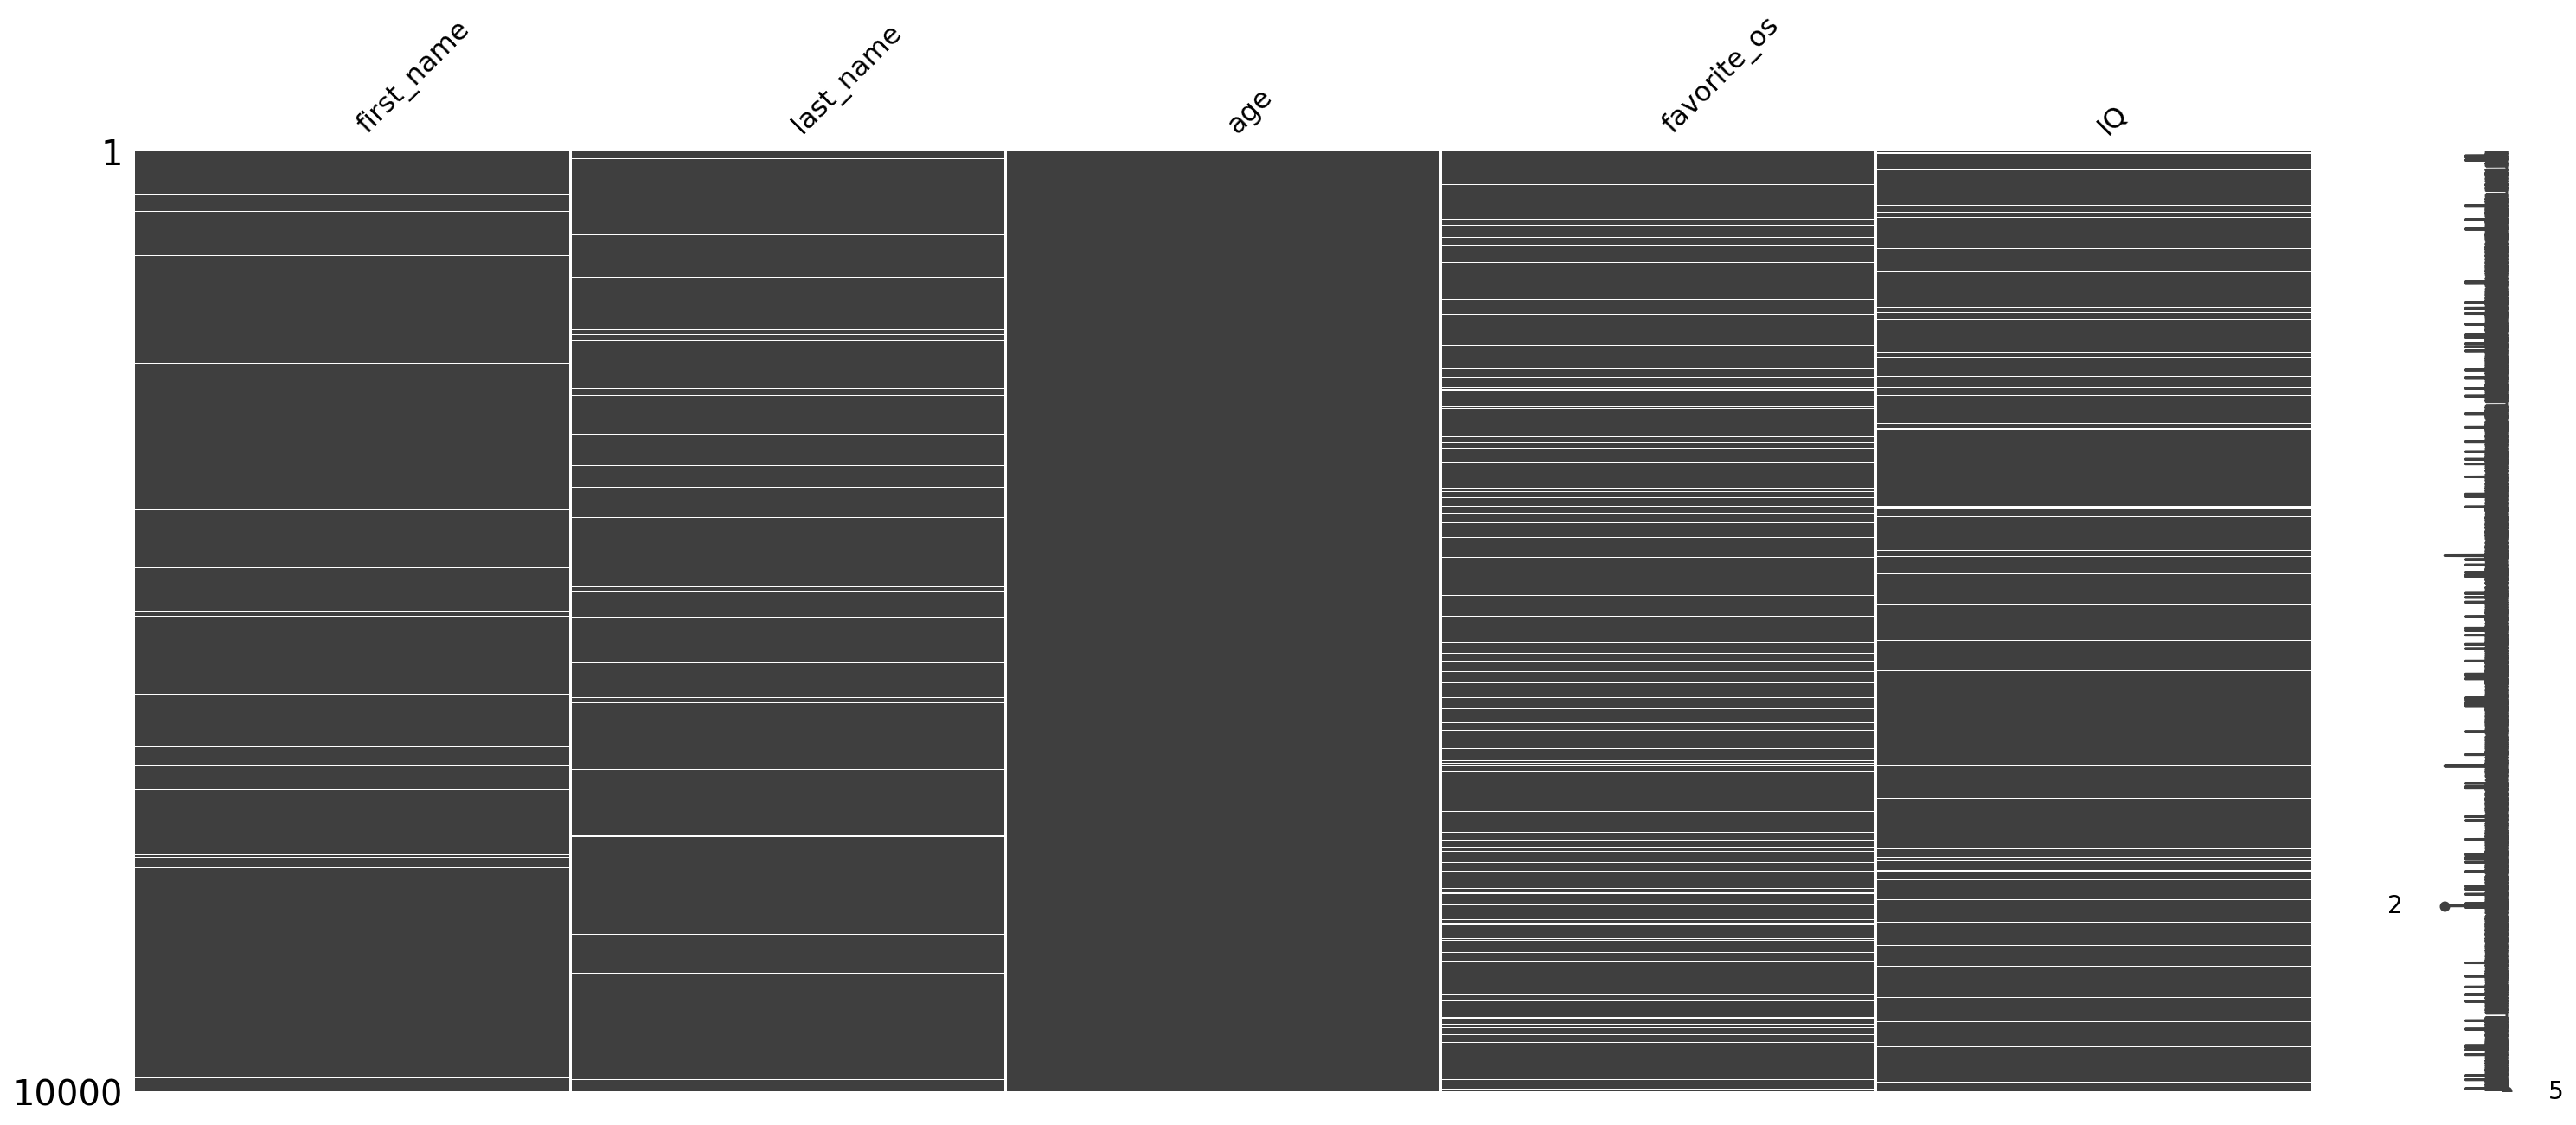

In [8]:
msno.matrix(survey);

In the matrix plot, each white line represents missing observations and the lines are visualized in the order they appear in the dataset, top to bottom. For large datasets like this, a cluster of missing values will form brighter white lines. For even larger ones, it is better to visualize only a random subset (`df.sample()`) of the dataset to get a better insight.

To find out if the missingness has any correlation with any of the existing variables, we will use a correlation heatmap. This time we will use the `diabetes` dataset:

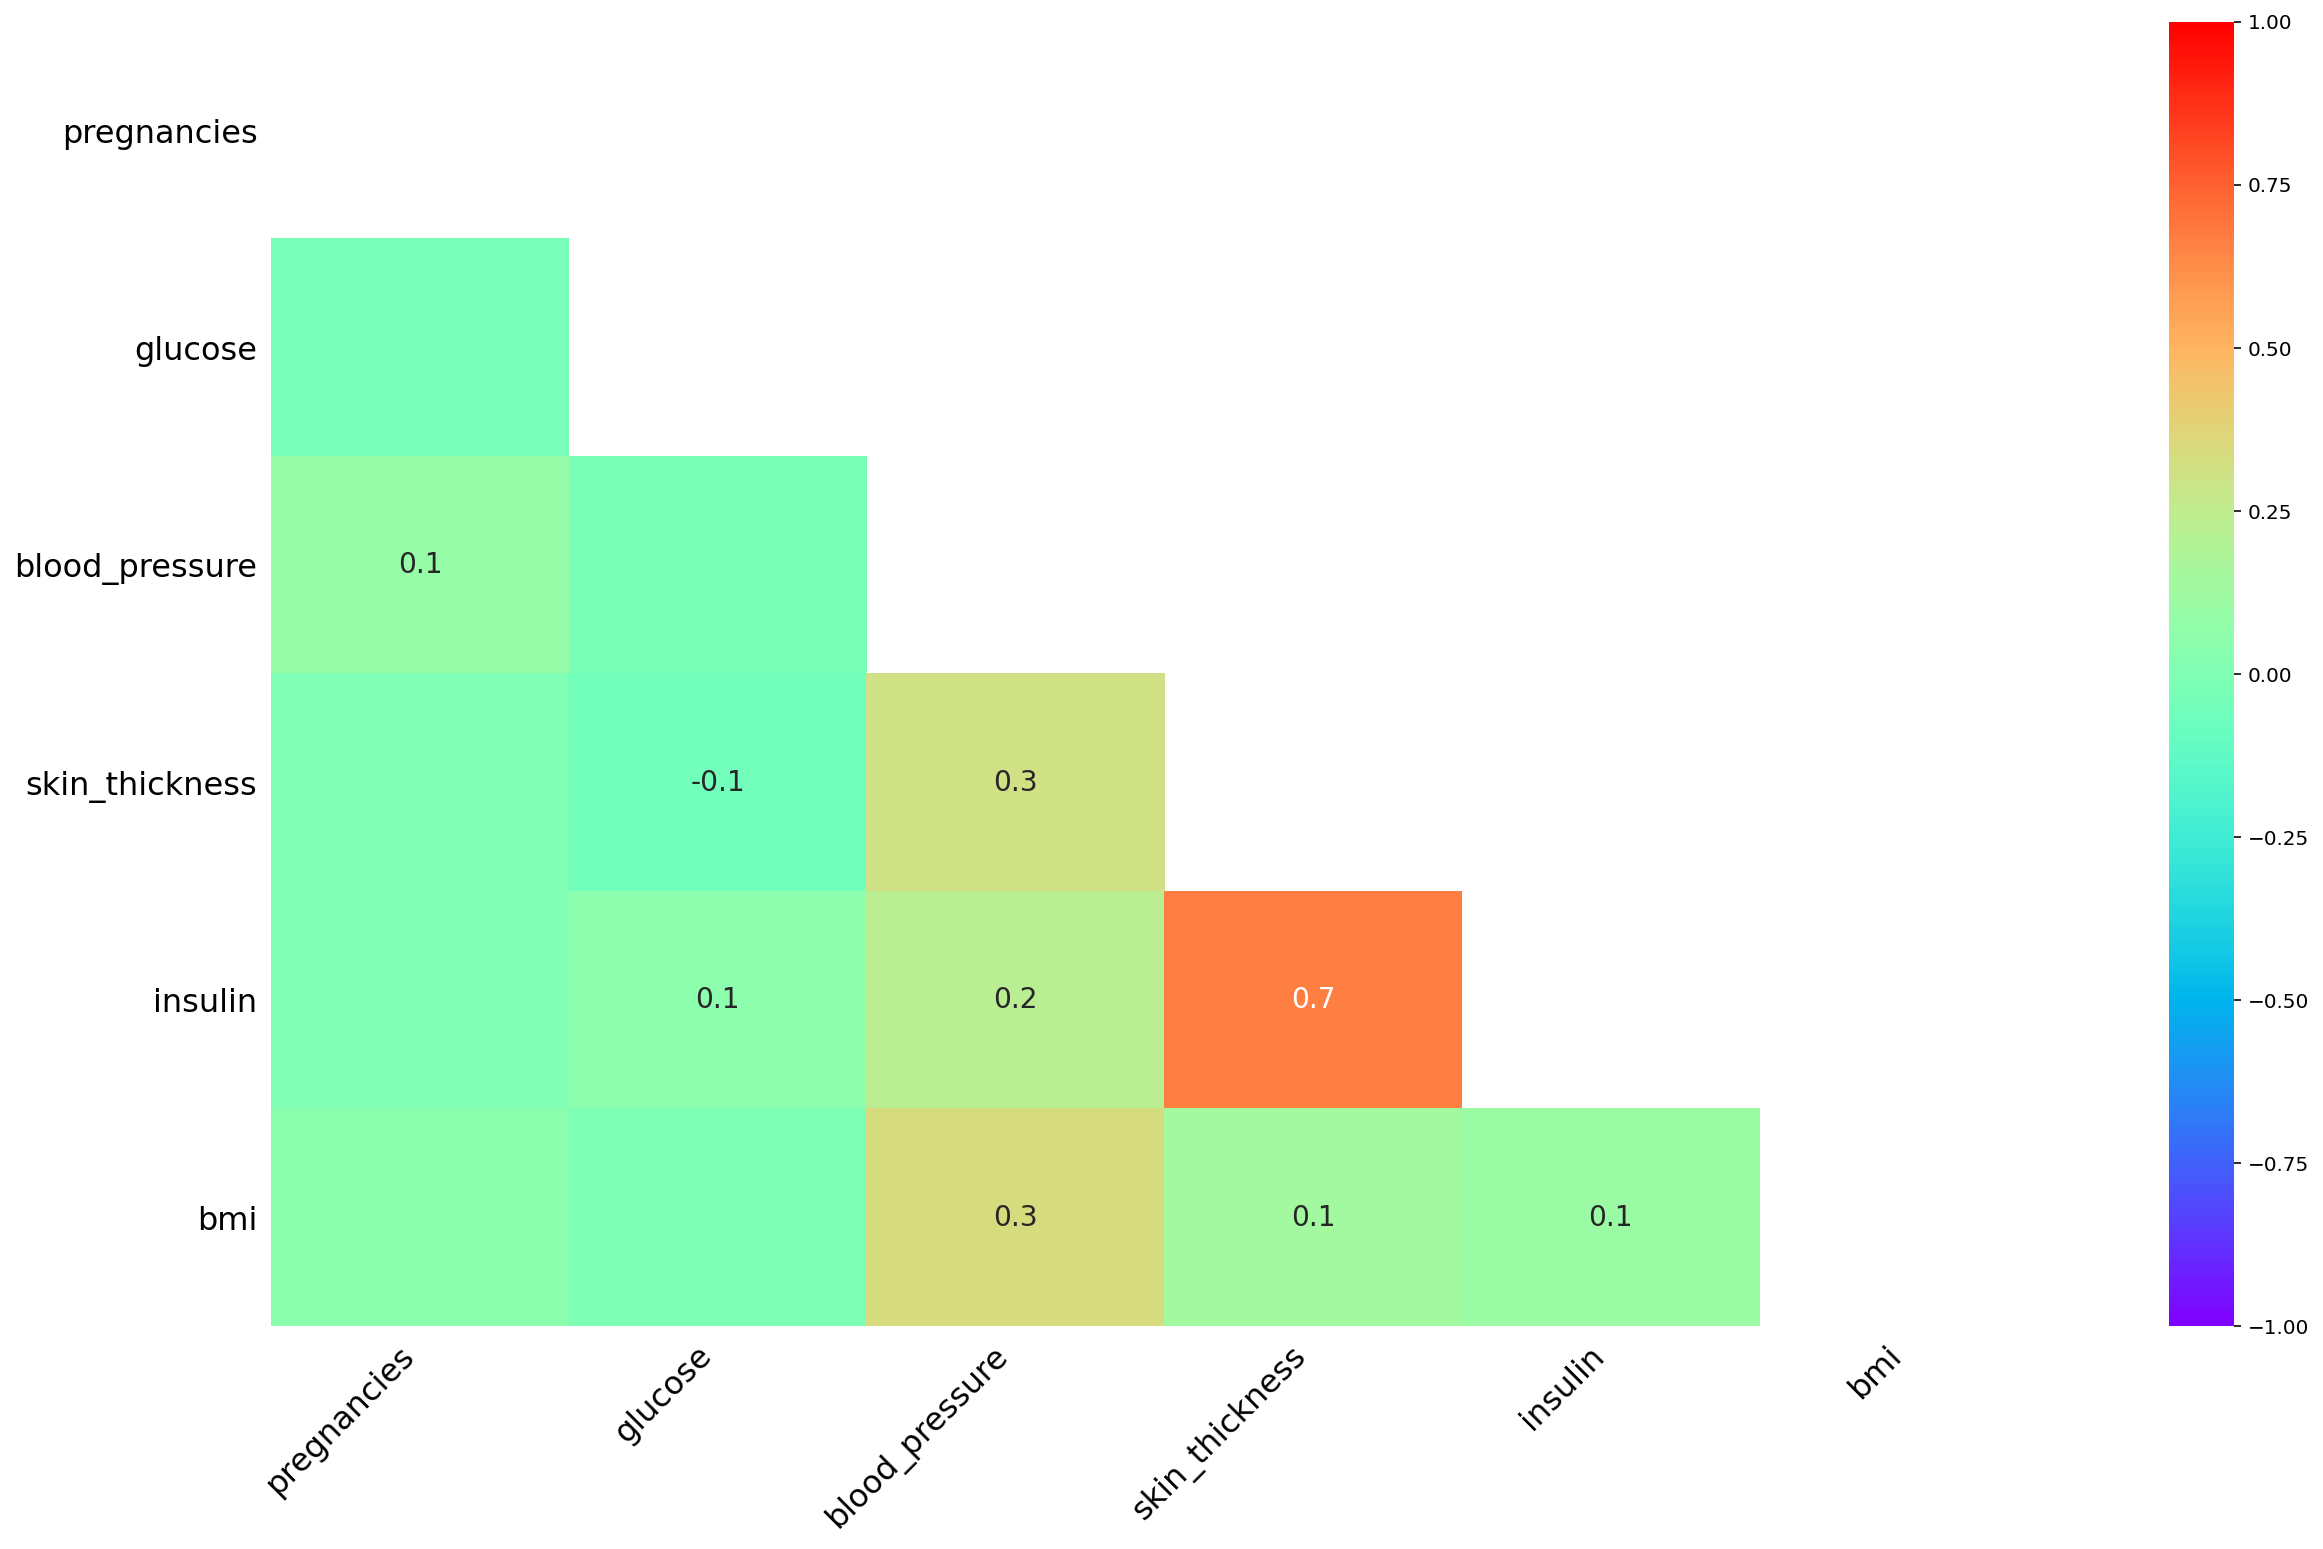

In [9]:
msno.heatmap(diabetes, cmap='rainbow');

The correlation heatmap will only include columns with missing values in the plot. The high scores indicate that missing values in one column is highly dependent on the missingness of another column.

One final plot, though not very useful, is a bar plot:

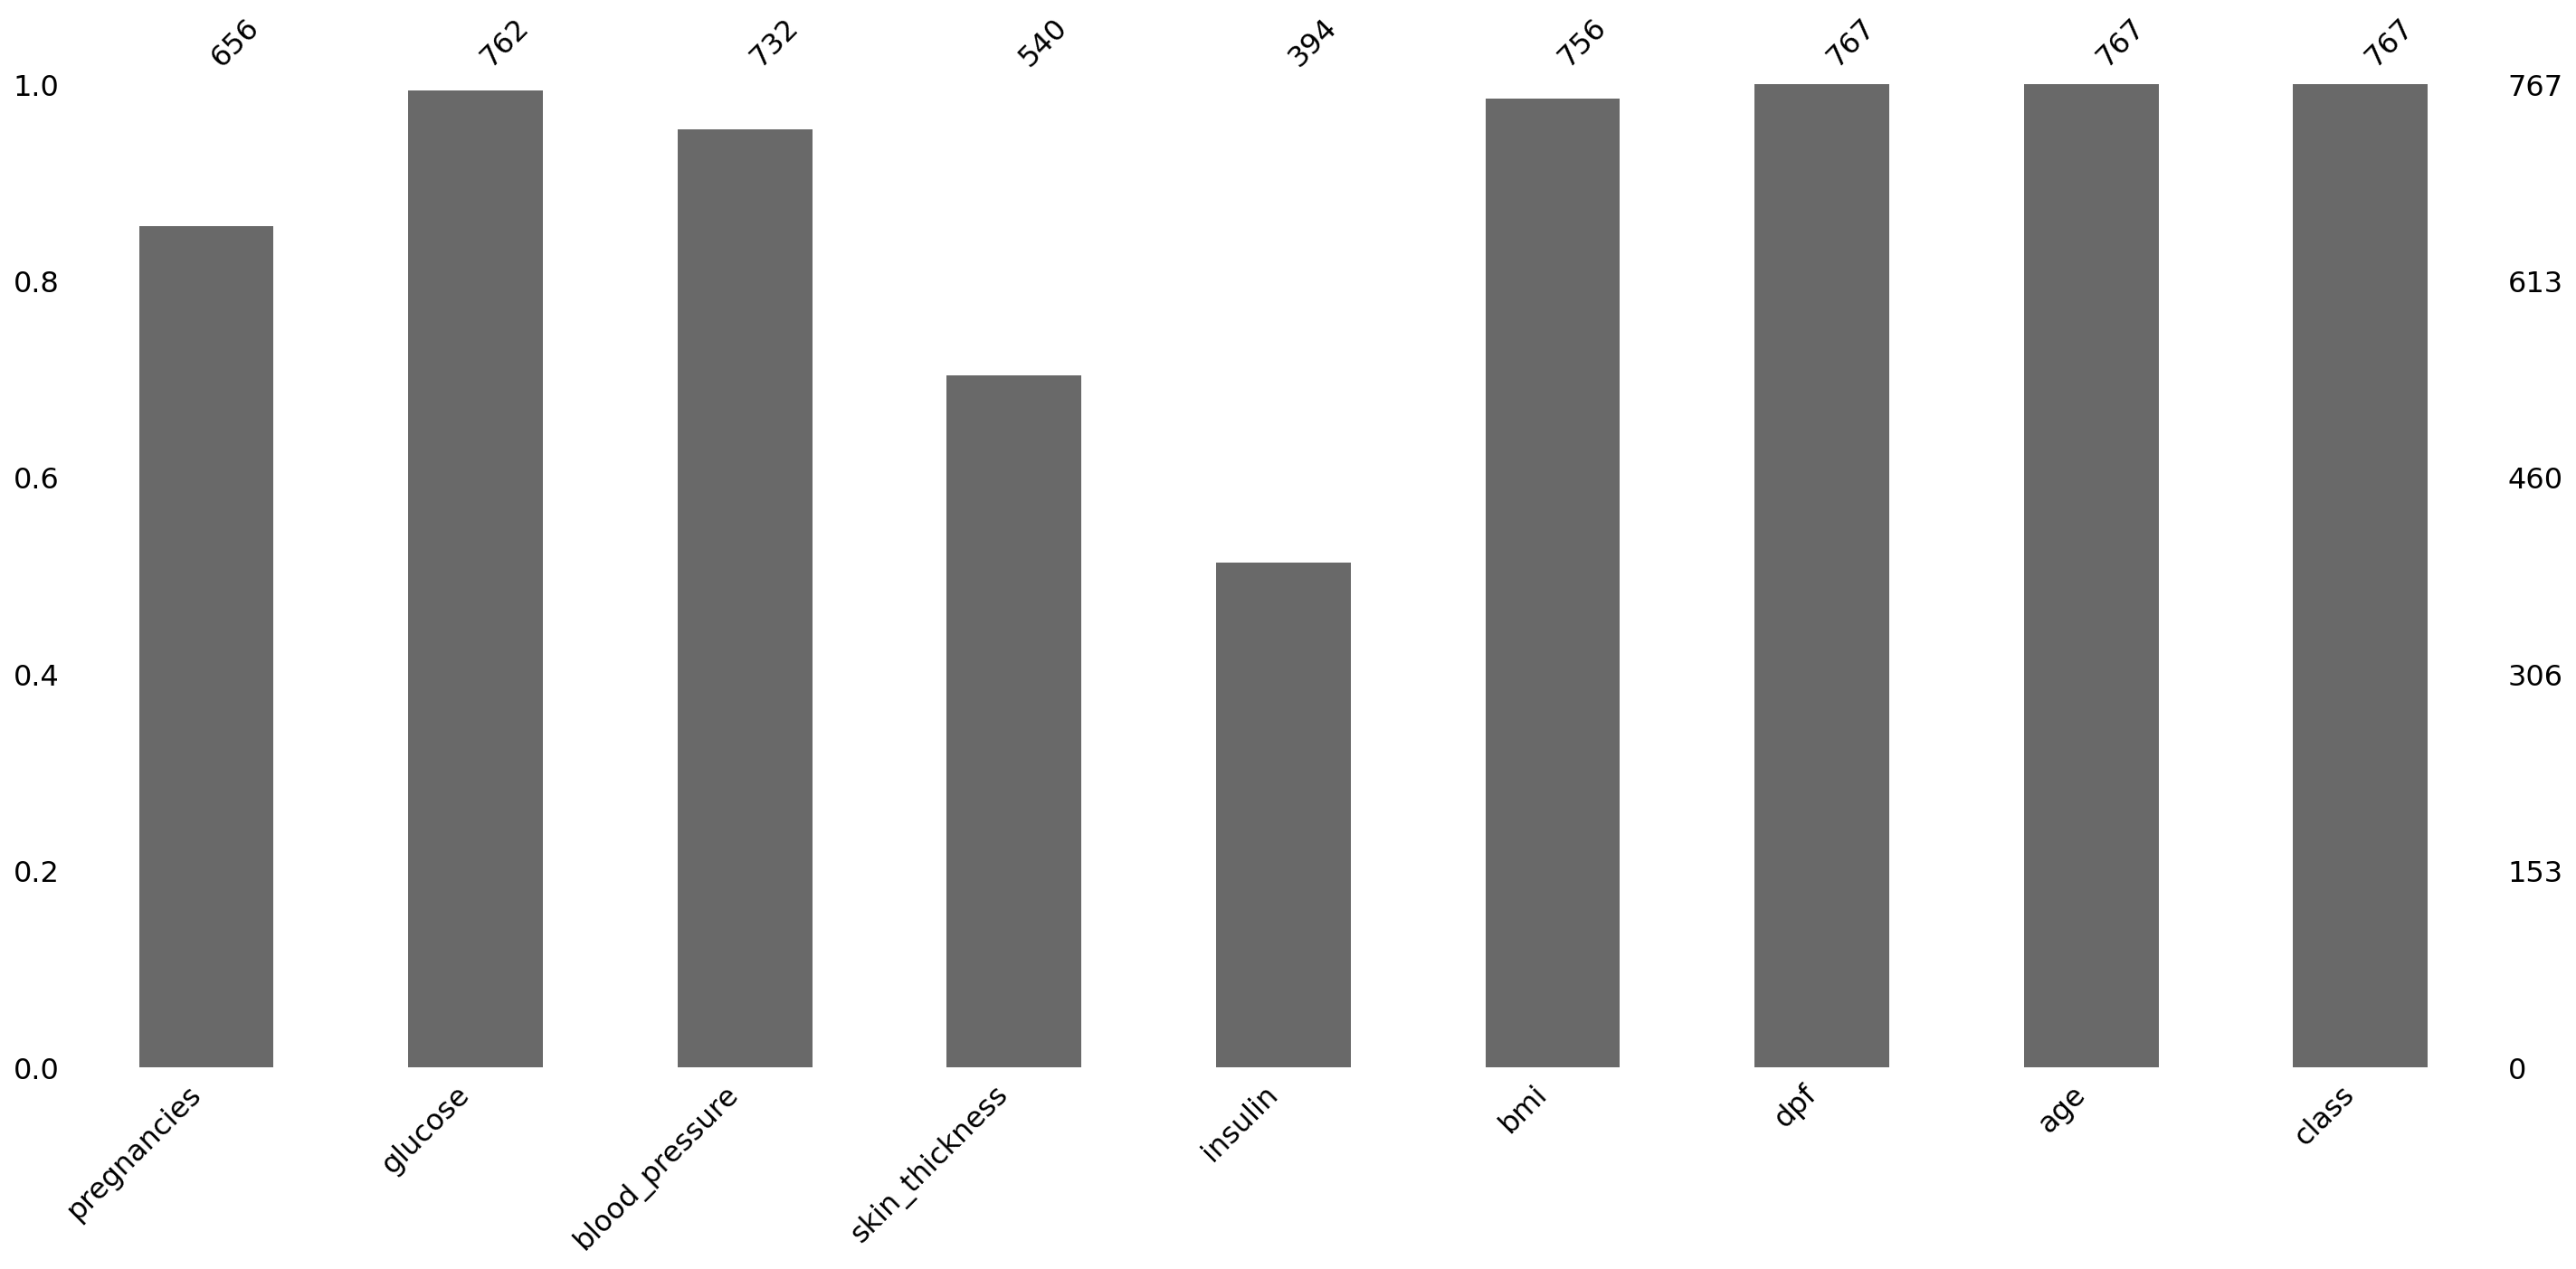

In [10]:
msno.bar(diabetes);

In the next sections, we will learn how to interpret these plots thoroughly.

### Missing Completely At Random, MCAR <small id='mcar'></small>

> Fancy description: Missingness has no relationship between any values, observed or missing.

First missingness type is Missing Completely At Random. As the name suggests, missing values occur completely at random. Such values have no relationship whatsoever with the existing values. They often occur because of technical or human errors during data entry. Let's see how they look like in a plot:

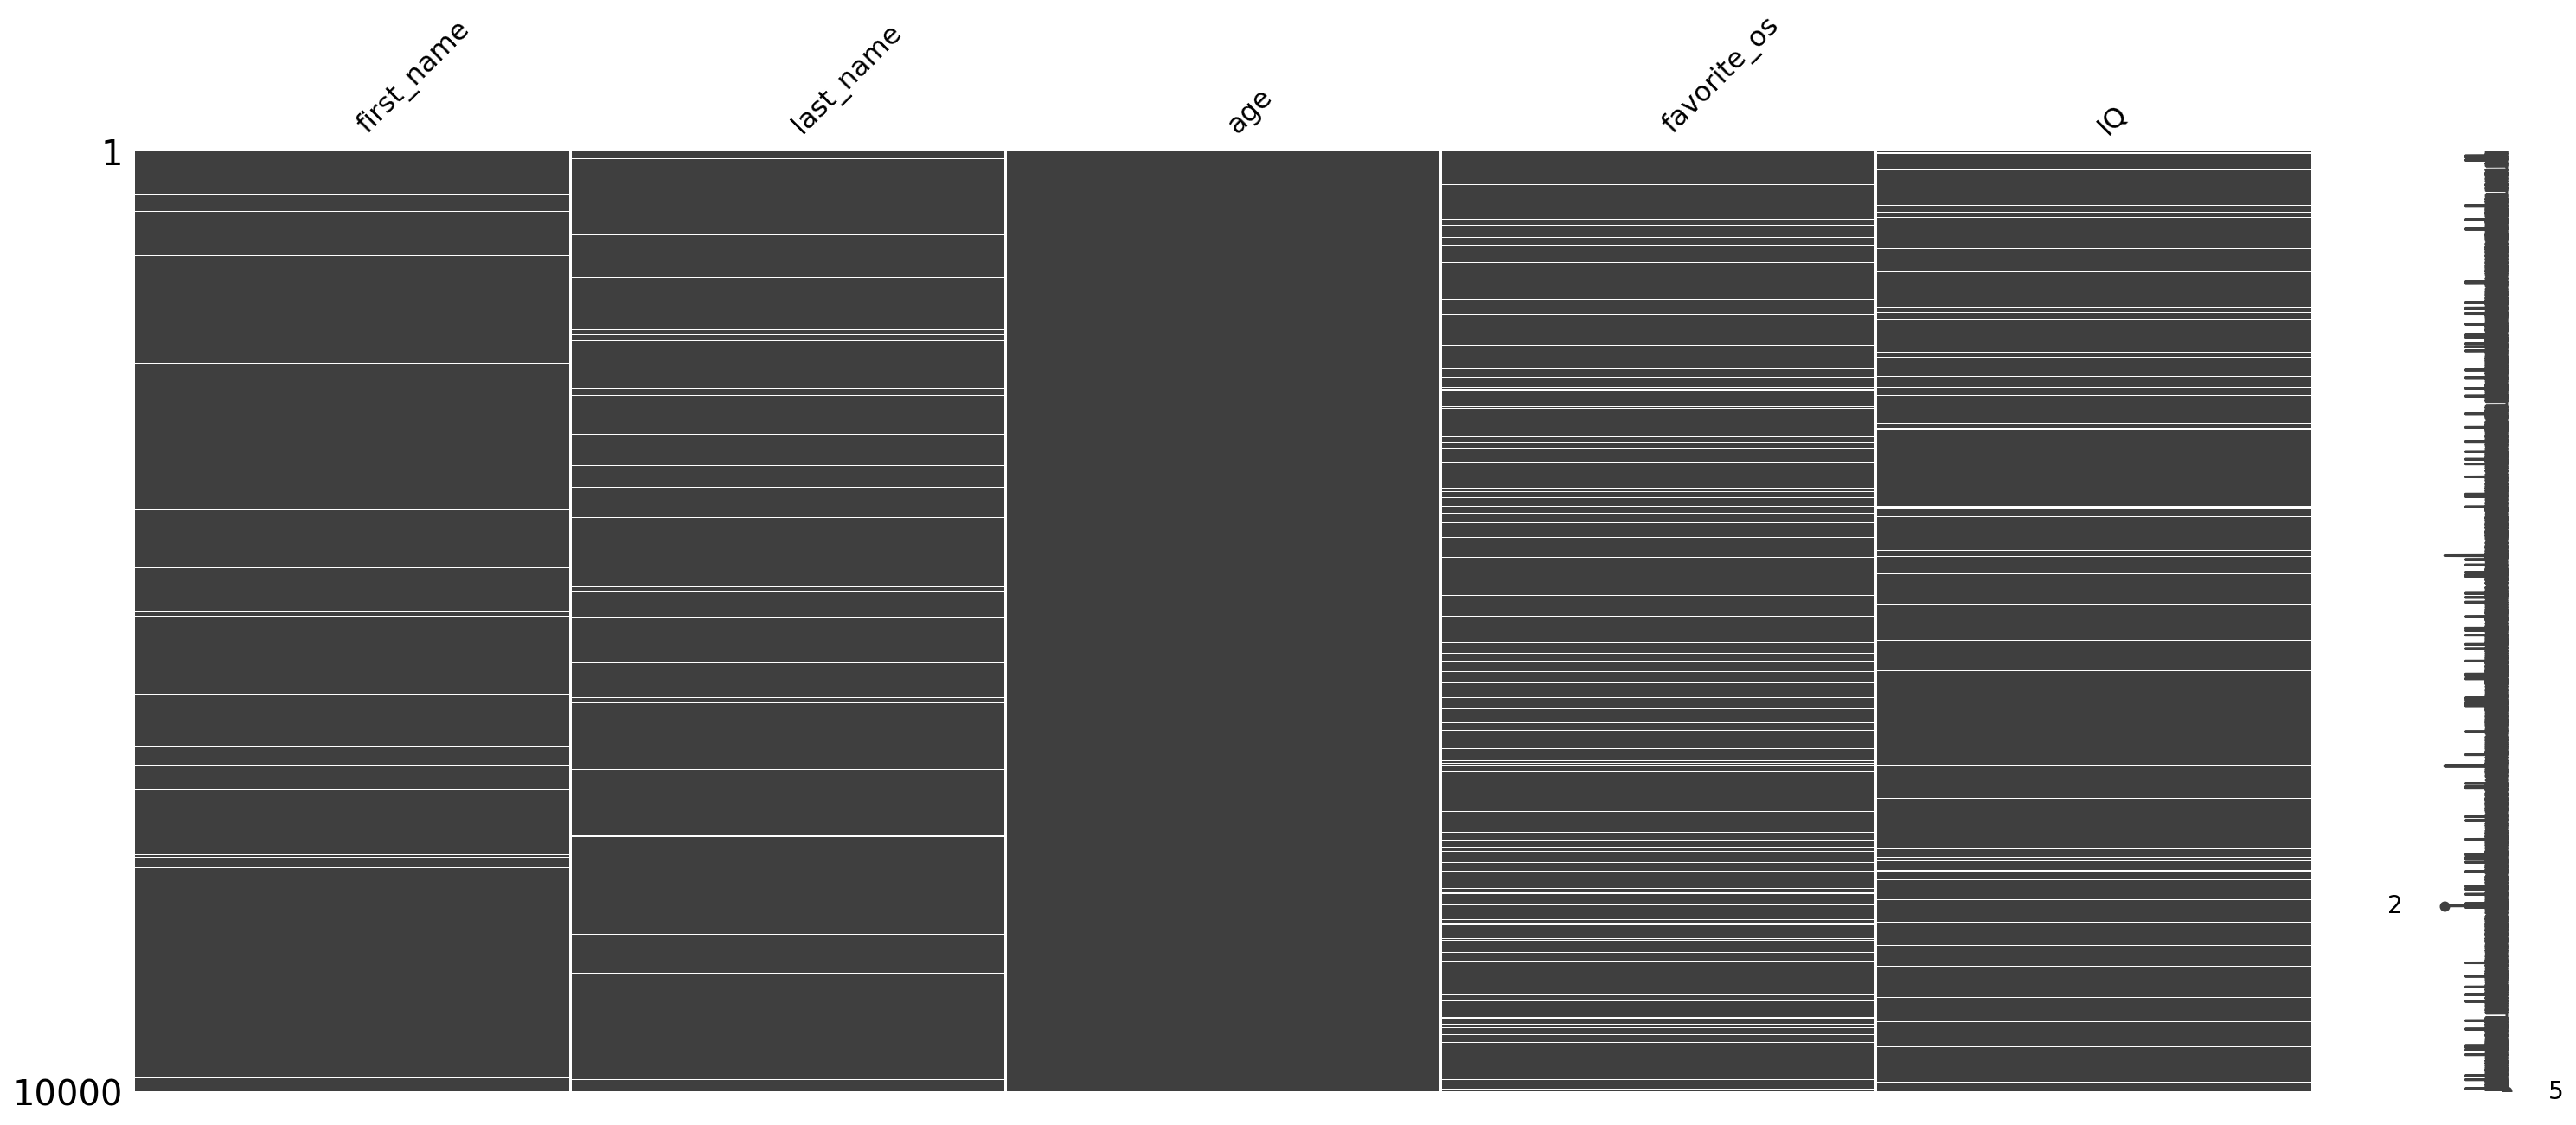

In [11]:
msno.matrix(survey);

Consider the first name and last name columns. The missing values seem to be pretty randomly scattered. They do look like MCAR. To really make sure they are random, we can sort by some other columns of the dataset:

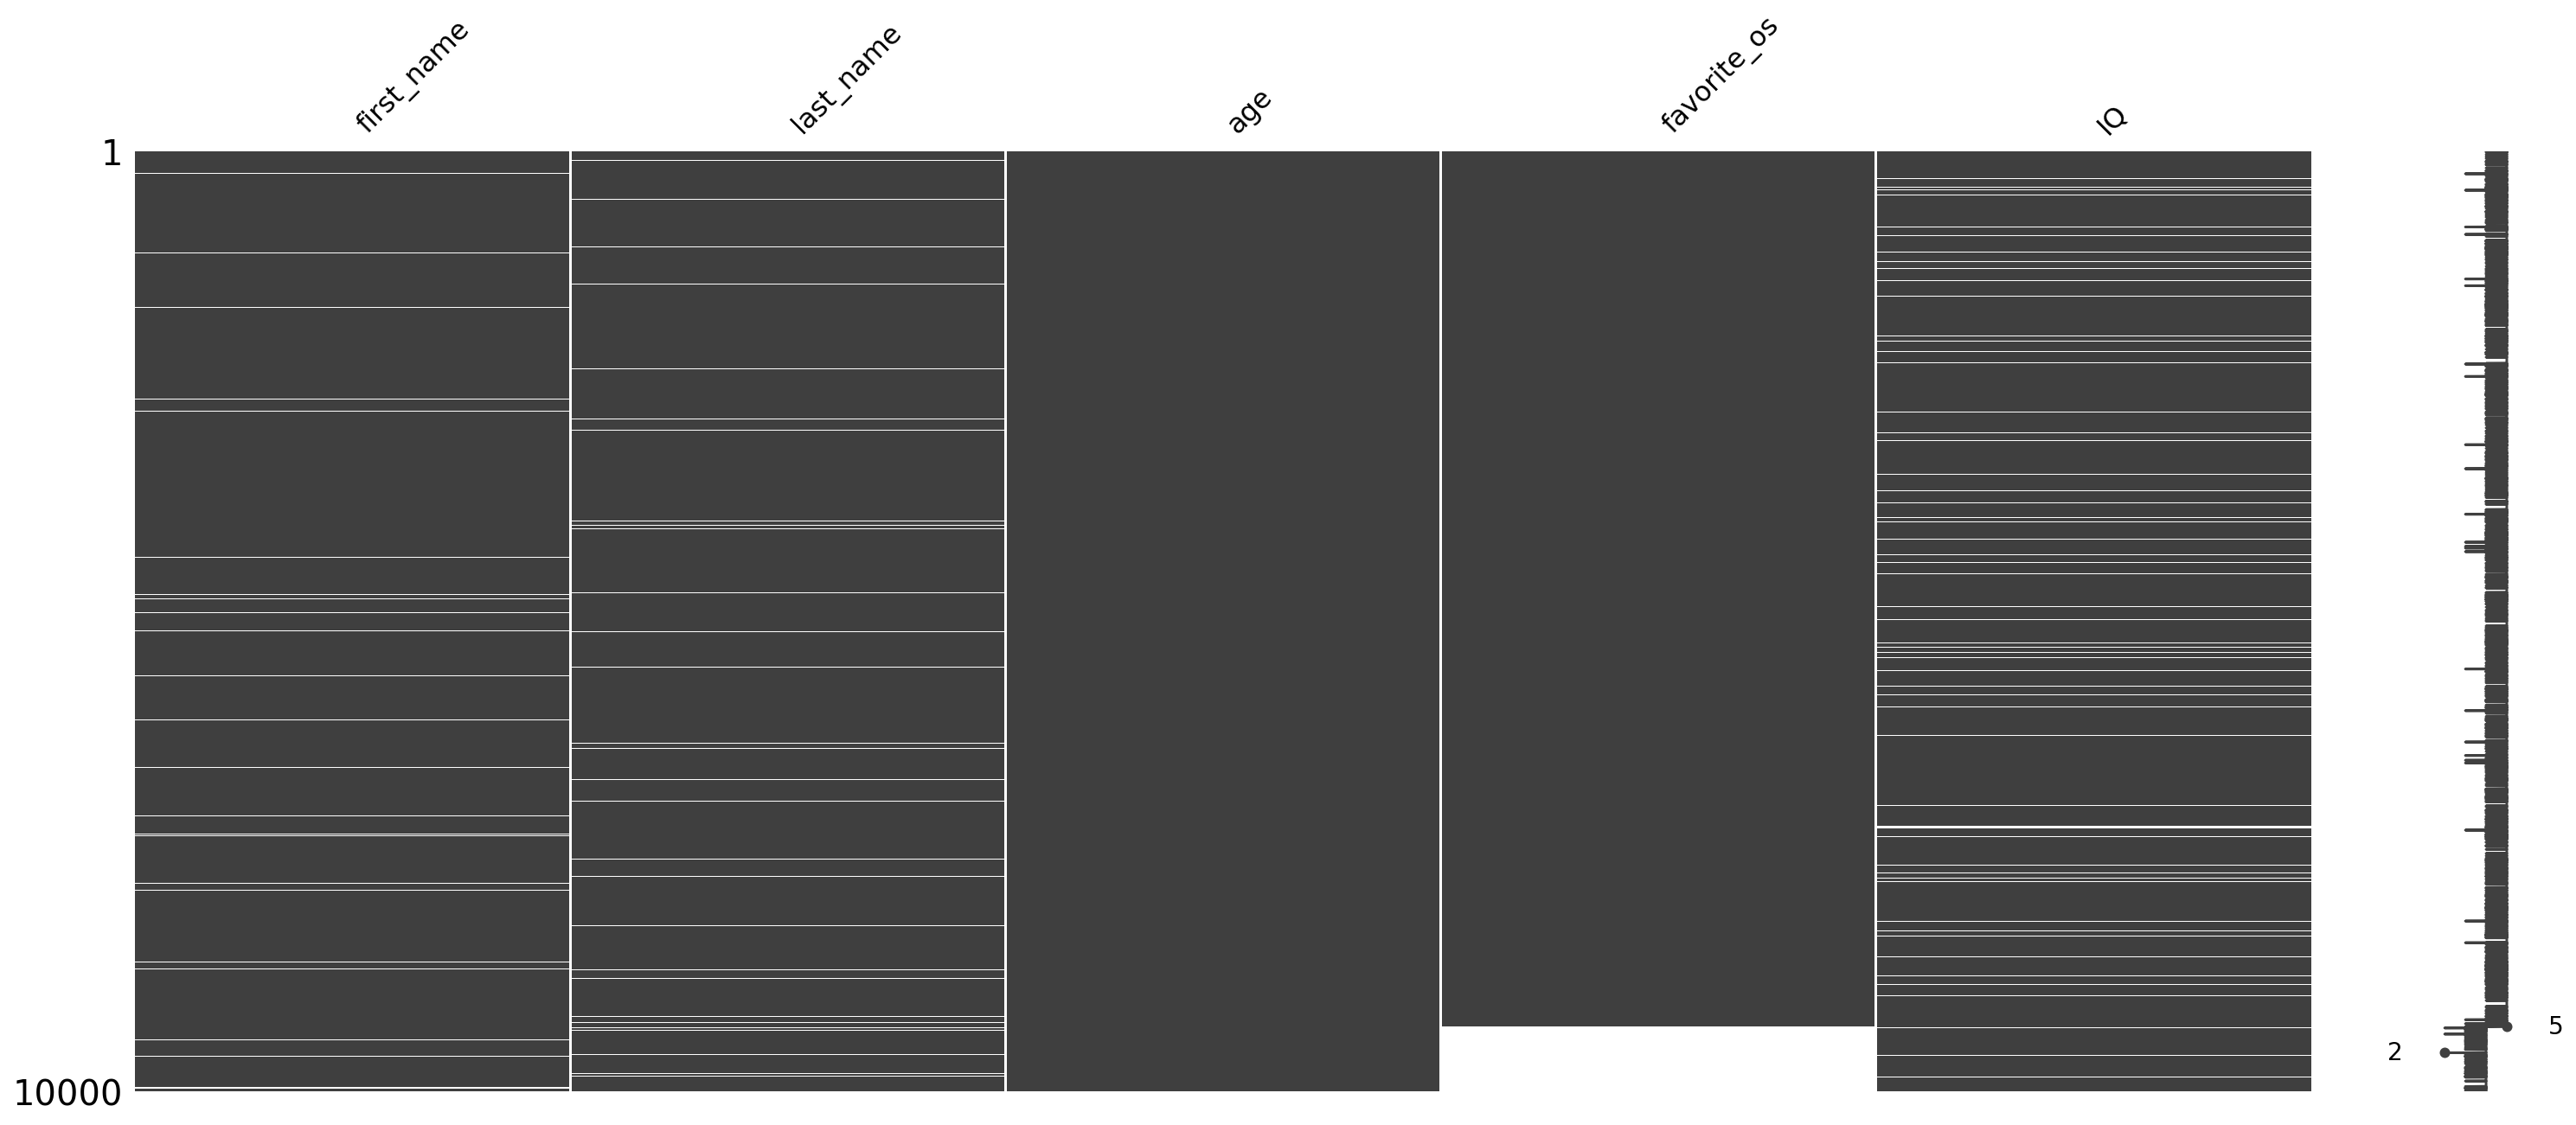

In [12]:
msno.matrix(survey.sort_values('age'));

Even when we sorted by `age`, the values still look random. This proves these values are missing completely at random. Another way would be by plotting a heat map to see if the missingness has any correlation:

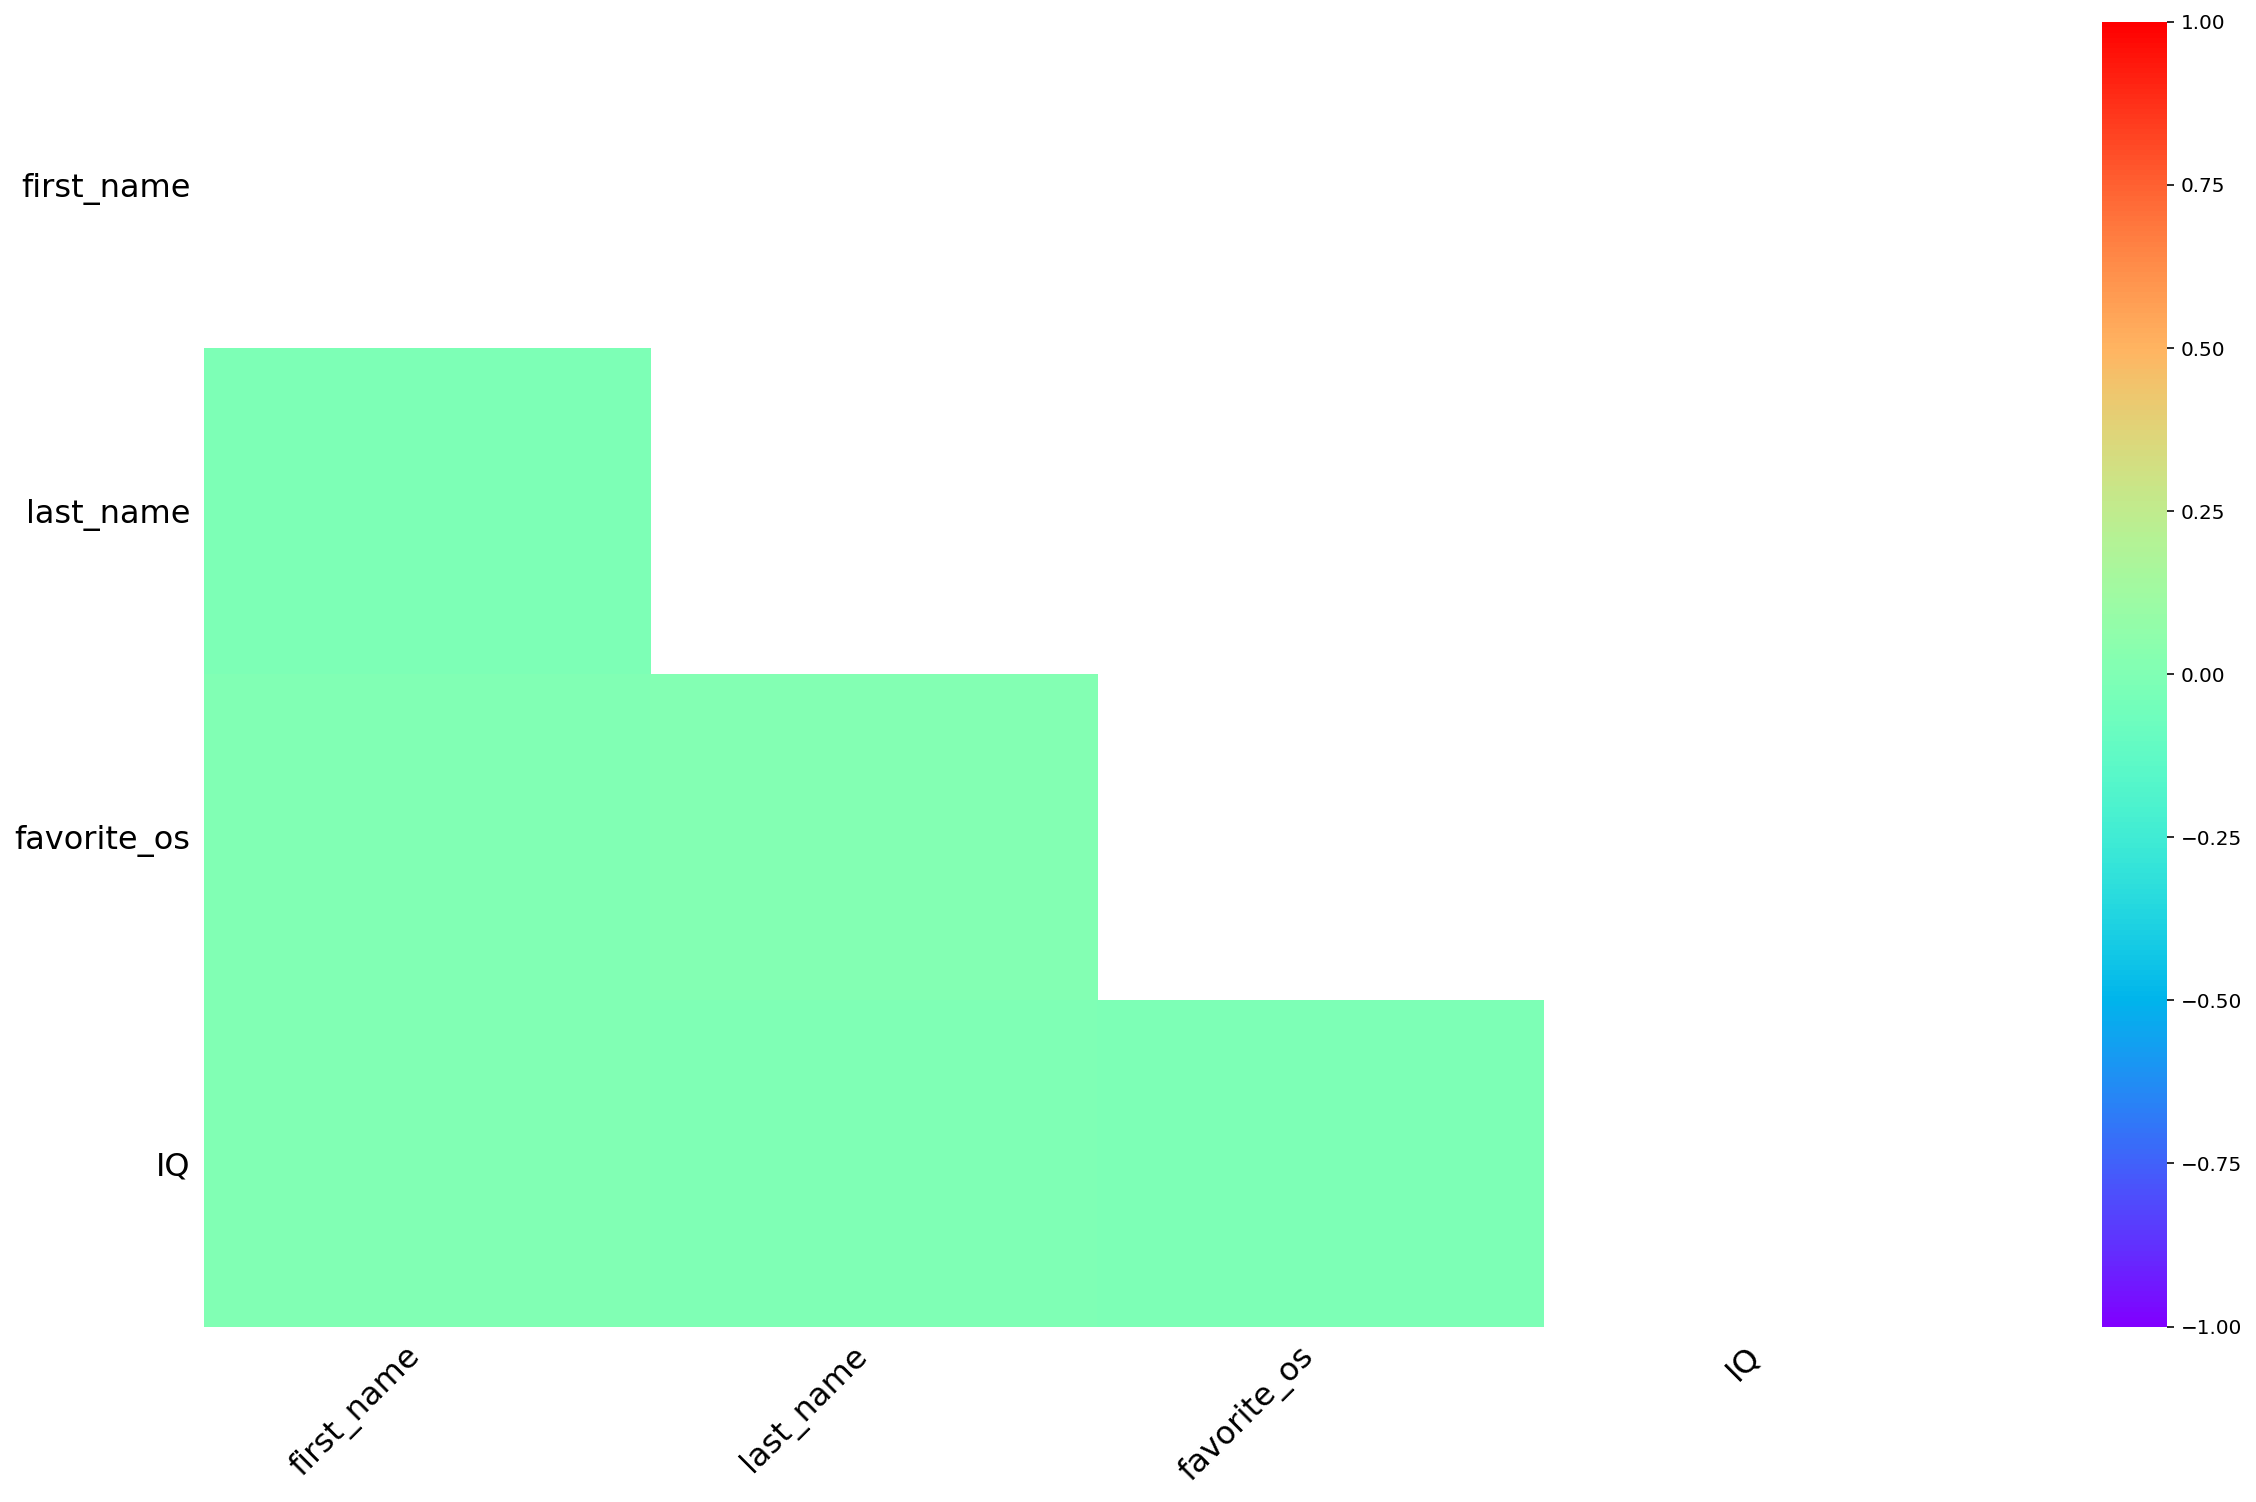

In [13]:
msno.heatmap(survey, cmap='rainbow');

The heatmap shows no score which again suggests complete randomness (of course, it would be random because it is randomly generated fake data, people 😁).

Now, for the `diabetes` dataset:

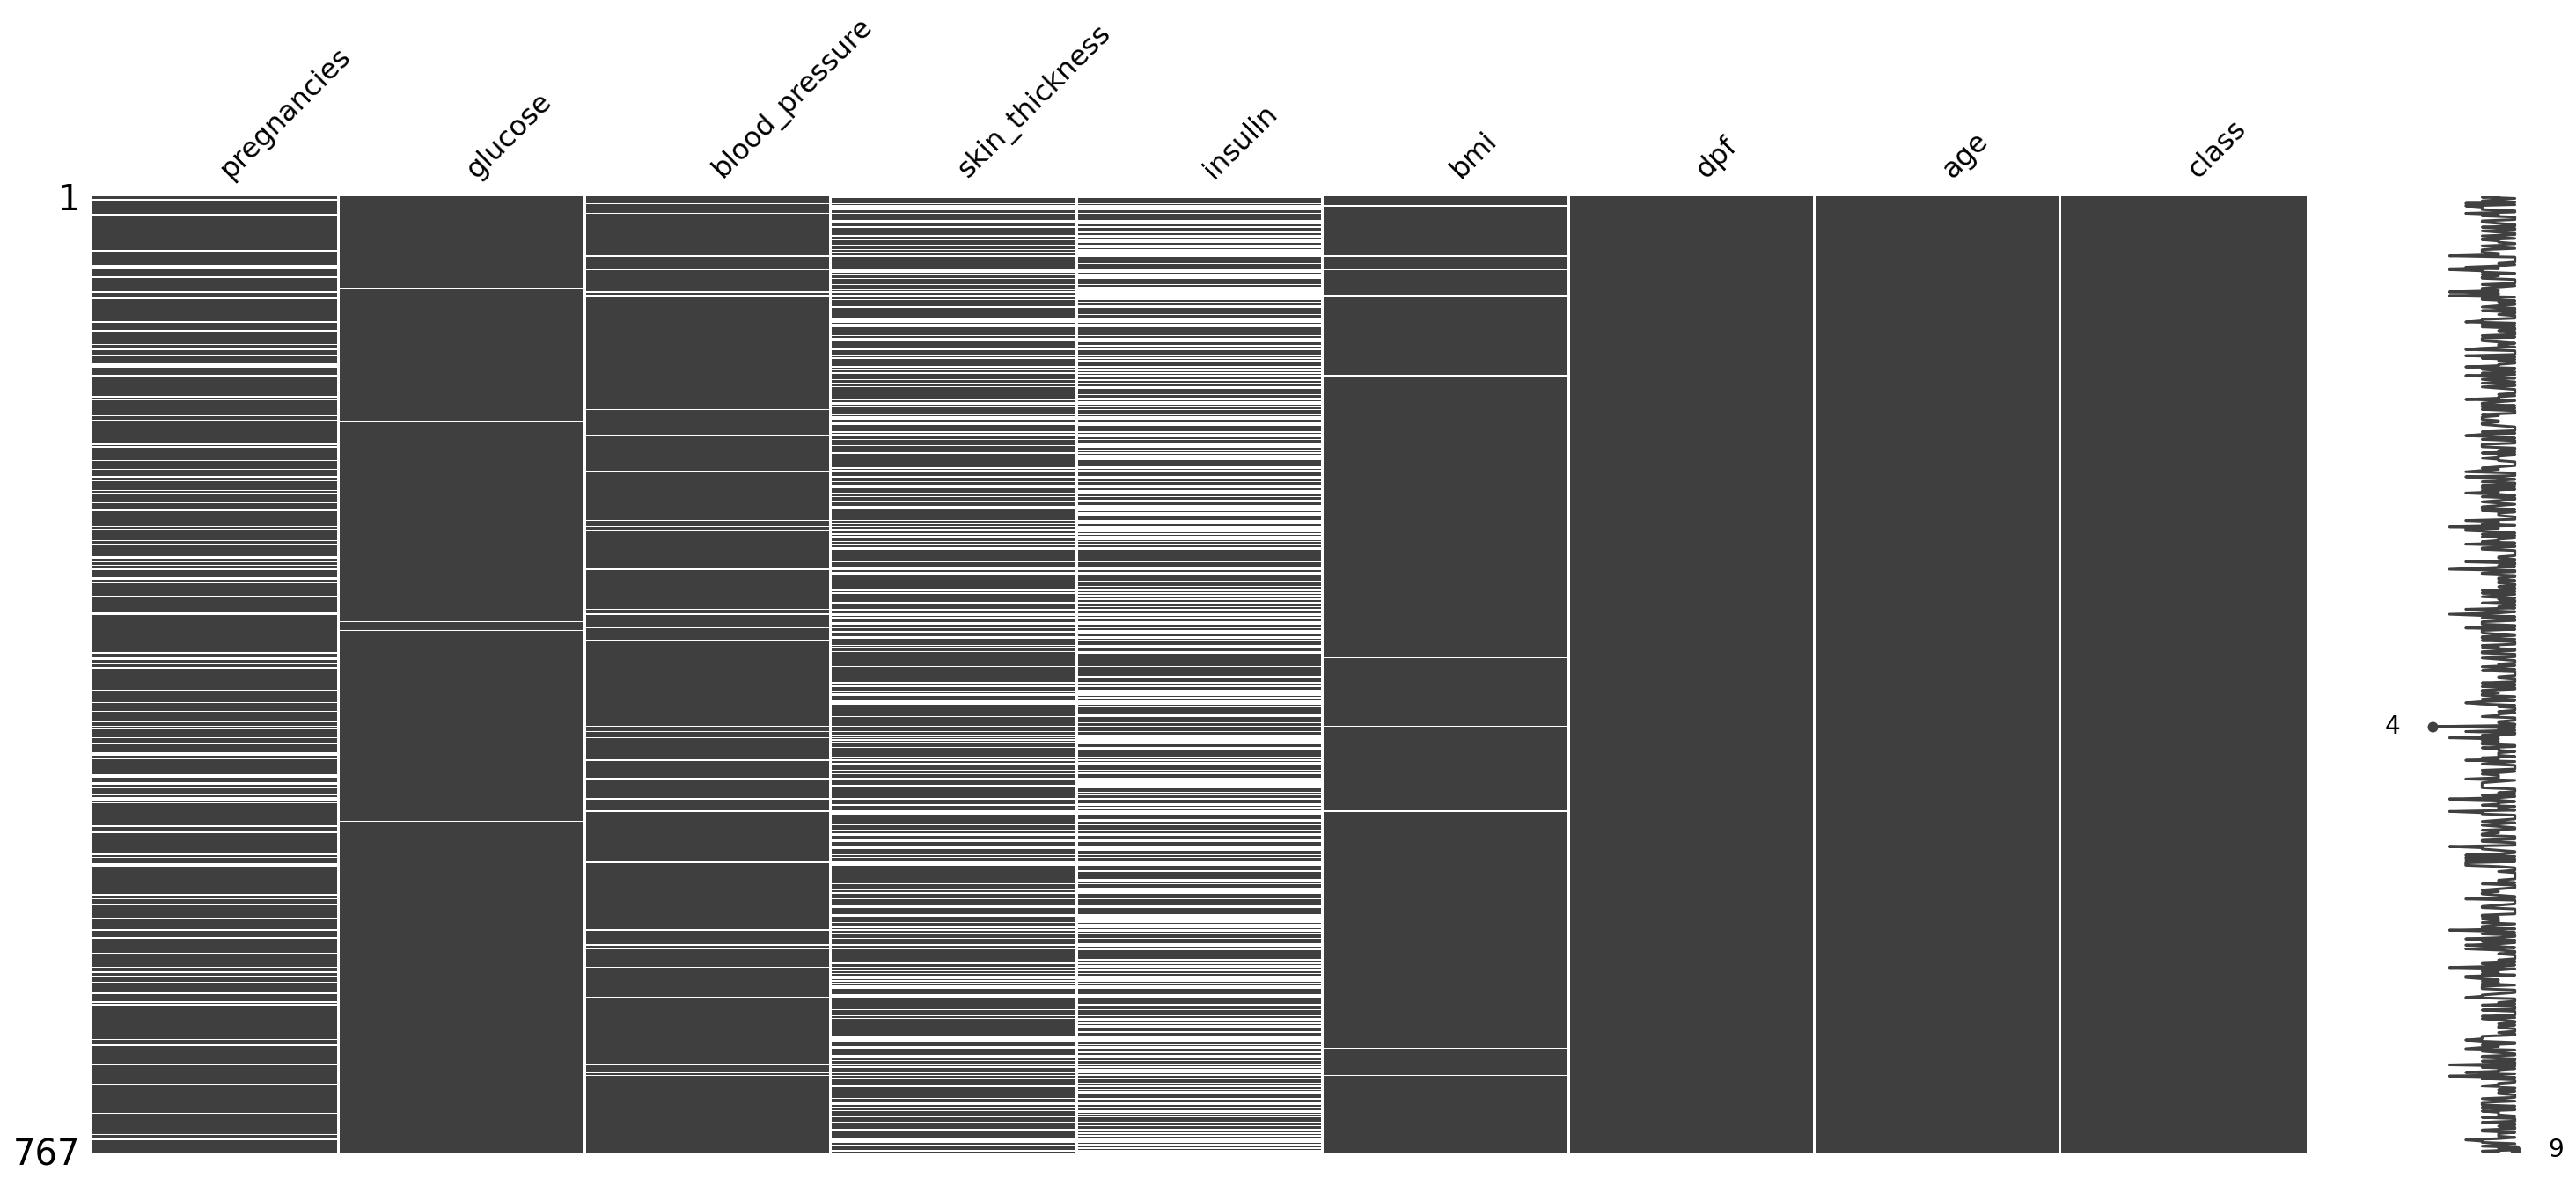

In [14]:
msno.matrix(diabetes);

For datasets that have many columns with missing values, it might not be easy to spot MCAR. Let's try a heatmap and come back to the above plot:

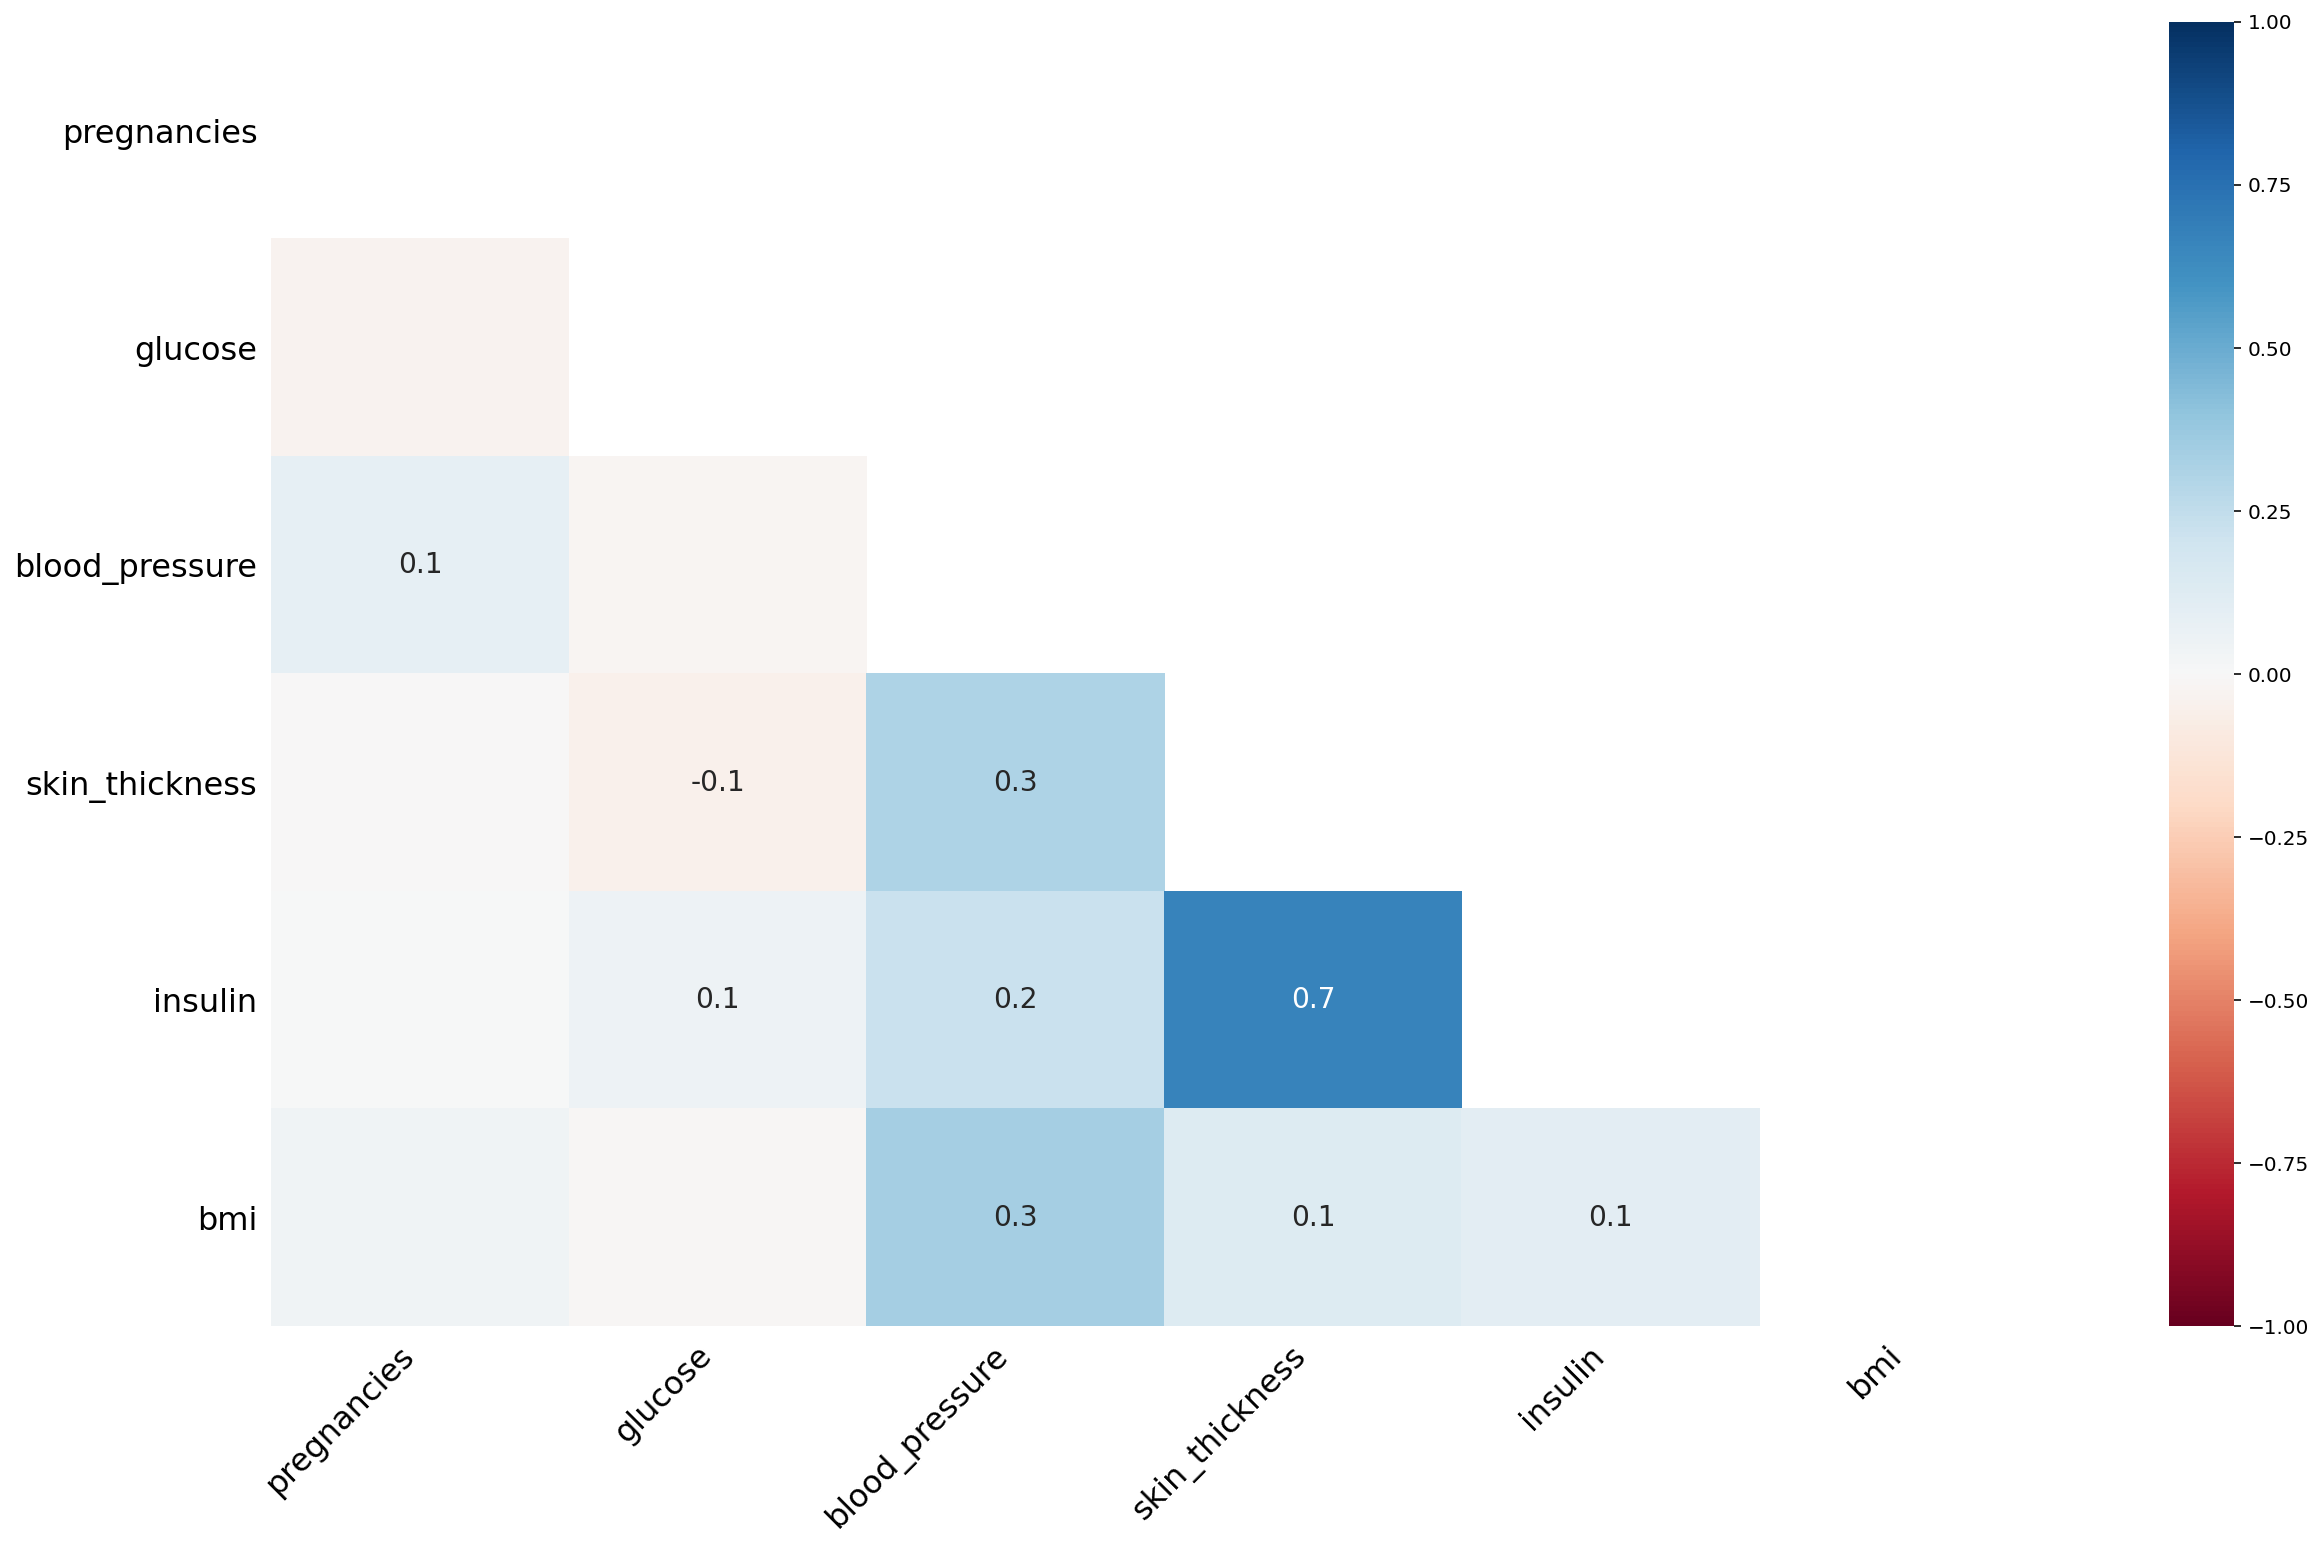

In [15]:
msno.heatmap(diabetes);

Missing observations in pregnancies, glucose, blood pressure, BMI columns have little or no correlation with other variables. However, we cannot say that they are all MCAR. Because if you pay attention, pregnancies column have much more missing values than the others. This cannot be due to chance and should be explored deeper, which we will in the last section. 

For the remaining three, we can safely say they are MCAR because of the small amount of missing values and low correlation. 

### Missingness Types: MAR <small id='mar'></small>

> Fancy description: There is a systematic relationship between missingness and other observed data but not the missing data.

Despite the tricky name, it is not all random. MAR is a broader class of MCAR. Here, the random loss of information is only confined to certain groups of data. 

Let me give you an example: you are working on a dataset of school attendance. You will find out that some group of students missed more lessons than the others. You decide to dig deeper and you will find out that those students were absent more during winter. This might suggest they missed their classes due to bad weather or they might have caught some illness. In this situation, the link between the missingness and the observed data is the season of the year. It is not random but a systematic relationship. 

If the missingness seems random but when you dig deeper and you find a relationship between an **existing** (this is the key) feature, it is always MAR. Getting back to our `survey` dataset, let's see the matrix plot again:

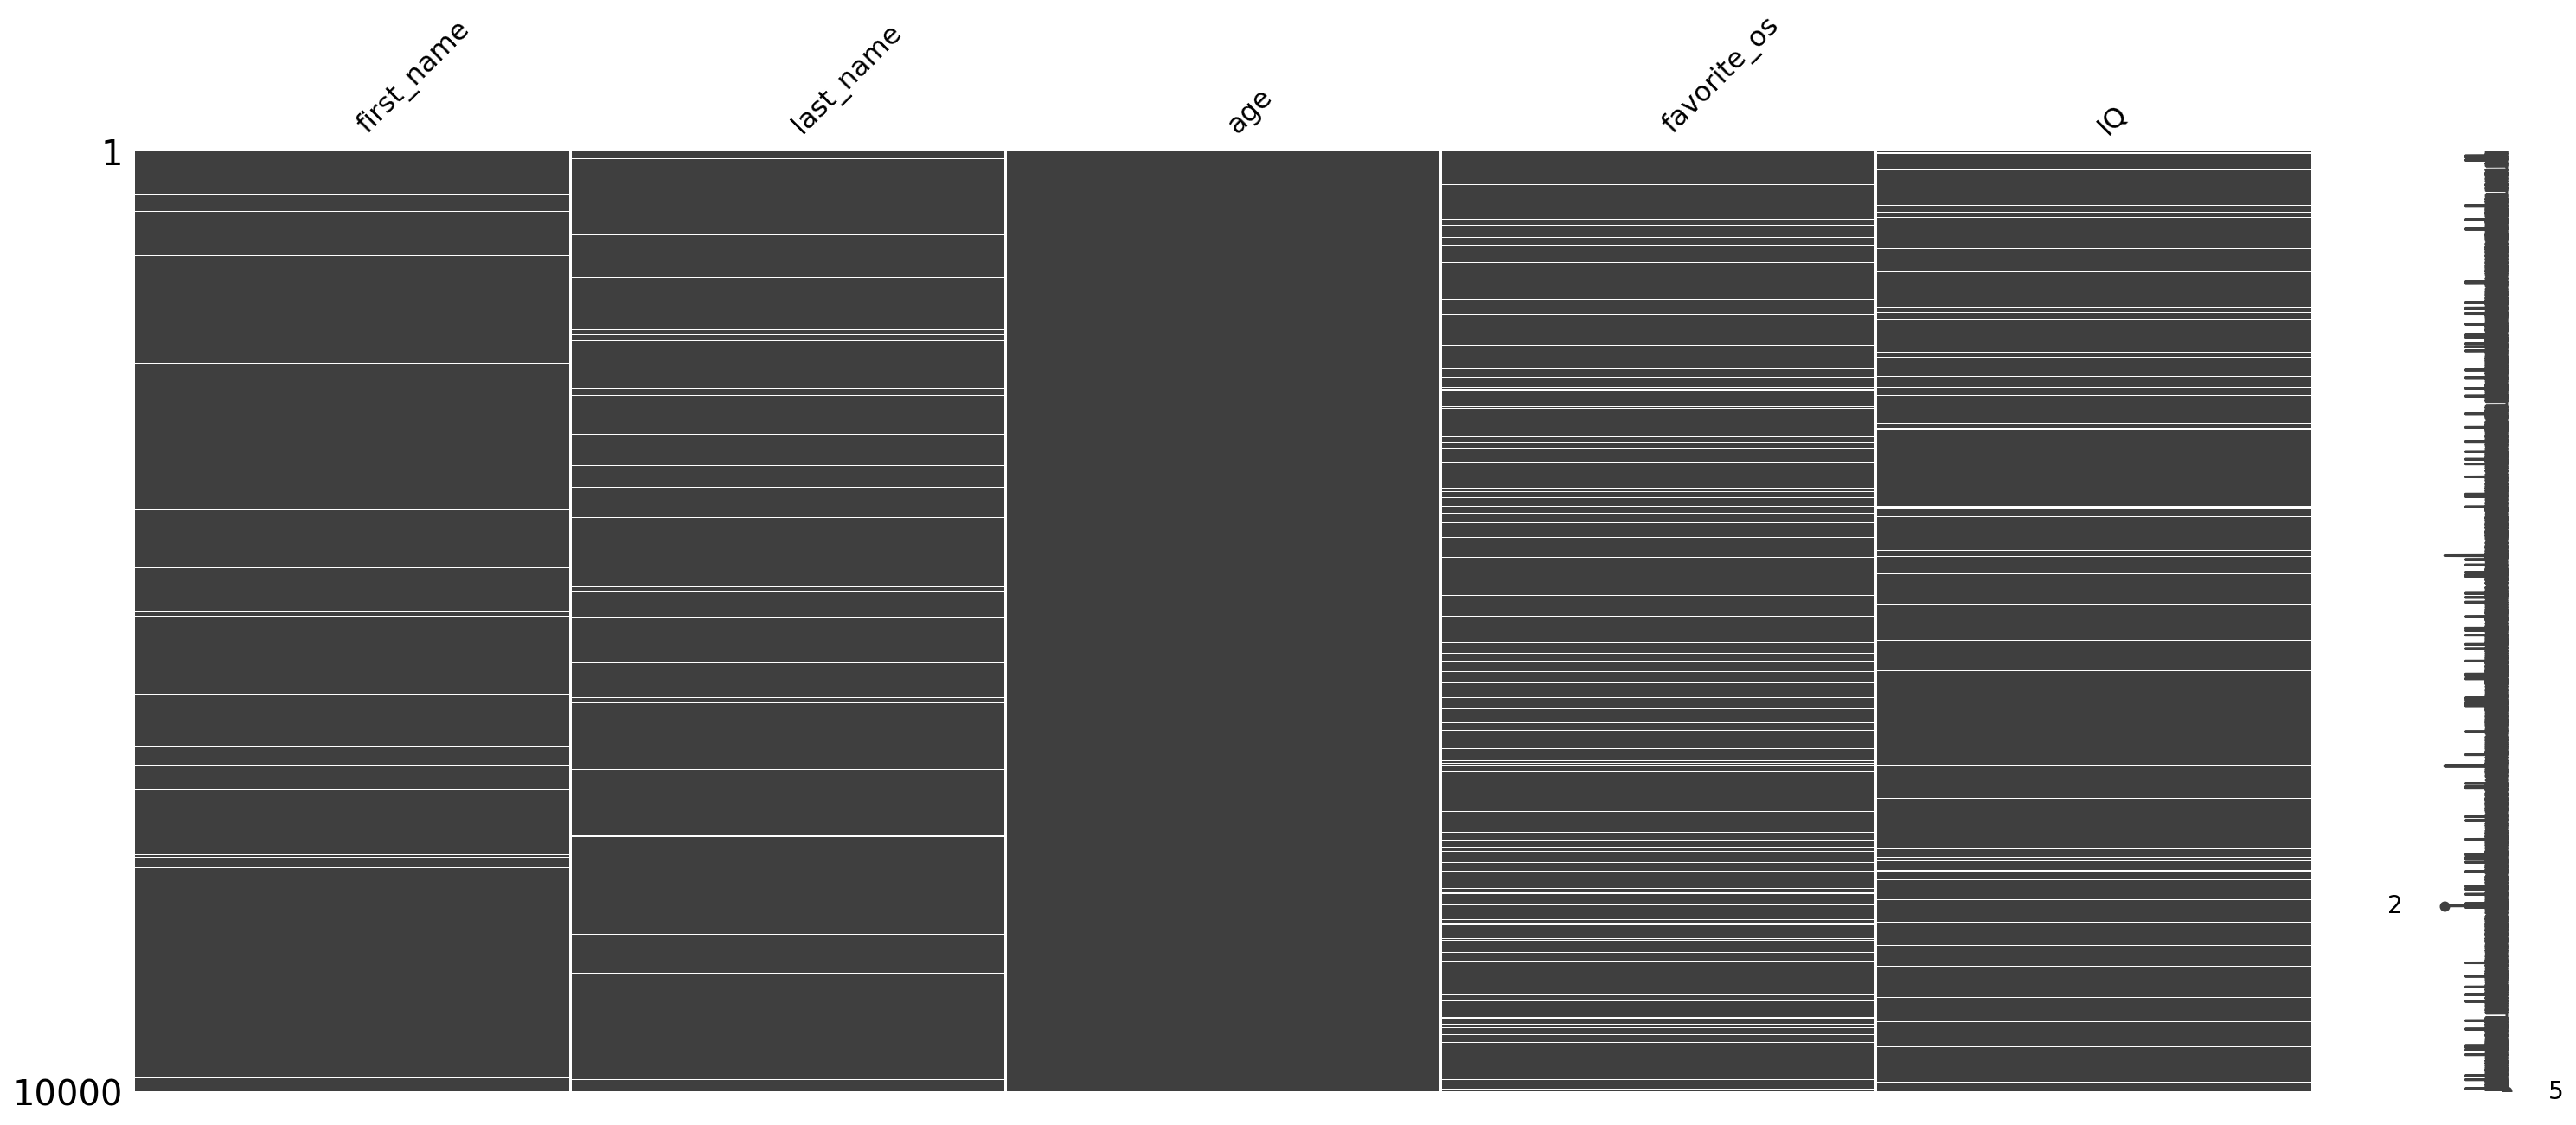

In [16]:
msno.matrix(survey);

The column `favorite_os` seems randomly scattered. Let's take a close look. We will isolate its null values and compare it to the rest of the observations:

In [17]:
missing_survey = survey[survey['favorite_os'].isna()]
complete_survey = survey[~survey['favorite_os'].isna()]

In [18]:
complete_survey.describe()

,age,IQ
count,9309.000000,8775.000000
mean,45.086690,106.834530
std,14.719695,13.052374
min,20.000000,85.000000
25%,32.000000,95.000000
50%,45.000000,107.000000
75%,58.000000,118.000000
max,70.000000,129.000000


In [19]:
missing_survey.describe()

,age,IQ
count,691.000000,657.000000
mean,72.522431,106.681887
std,1.120560,12.690290
min,71.000000,85.000000
25%,72.000000,96.000000
50%,73.000000,107.000000
75%,74.000000,118.000000
max,74.000000,129.000000


The `IQ` column does not give much insight but if we look at the `age` column of missing values, all the values seem to be over 70. This might mean that people older than 70 simply left out their favorite mobile operating system. This might be because the elderly are not very good with modern technology and they did not have a phone. We can confirm these findings visually by sorting the data frame by `age`:

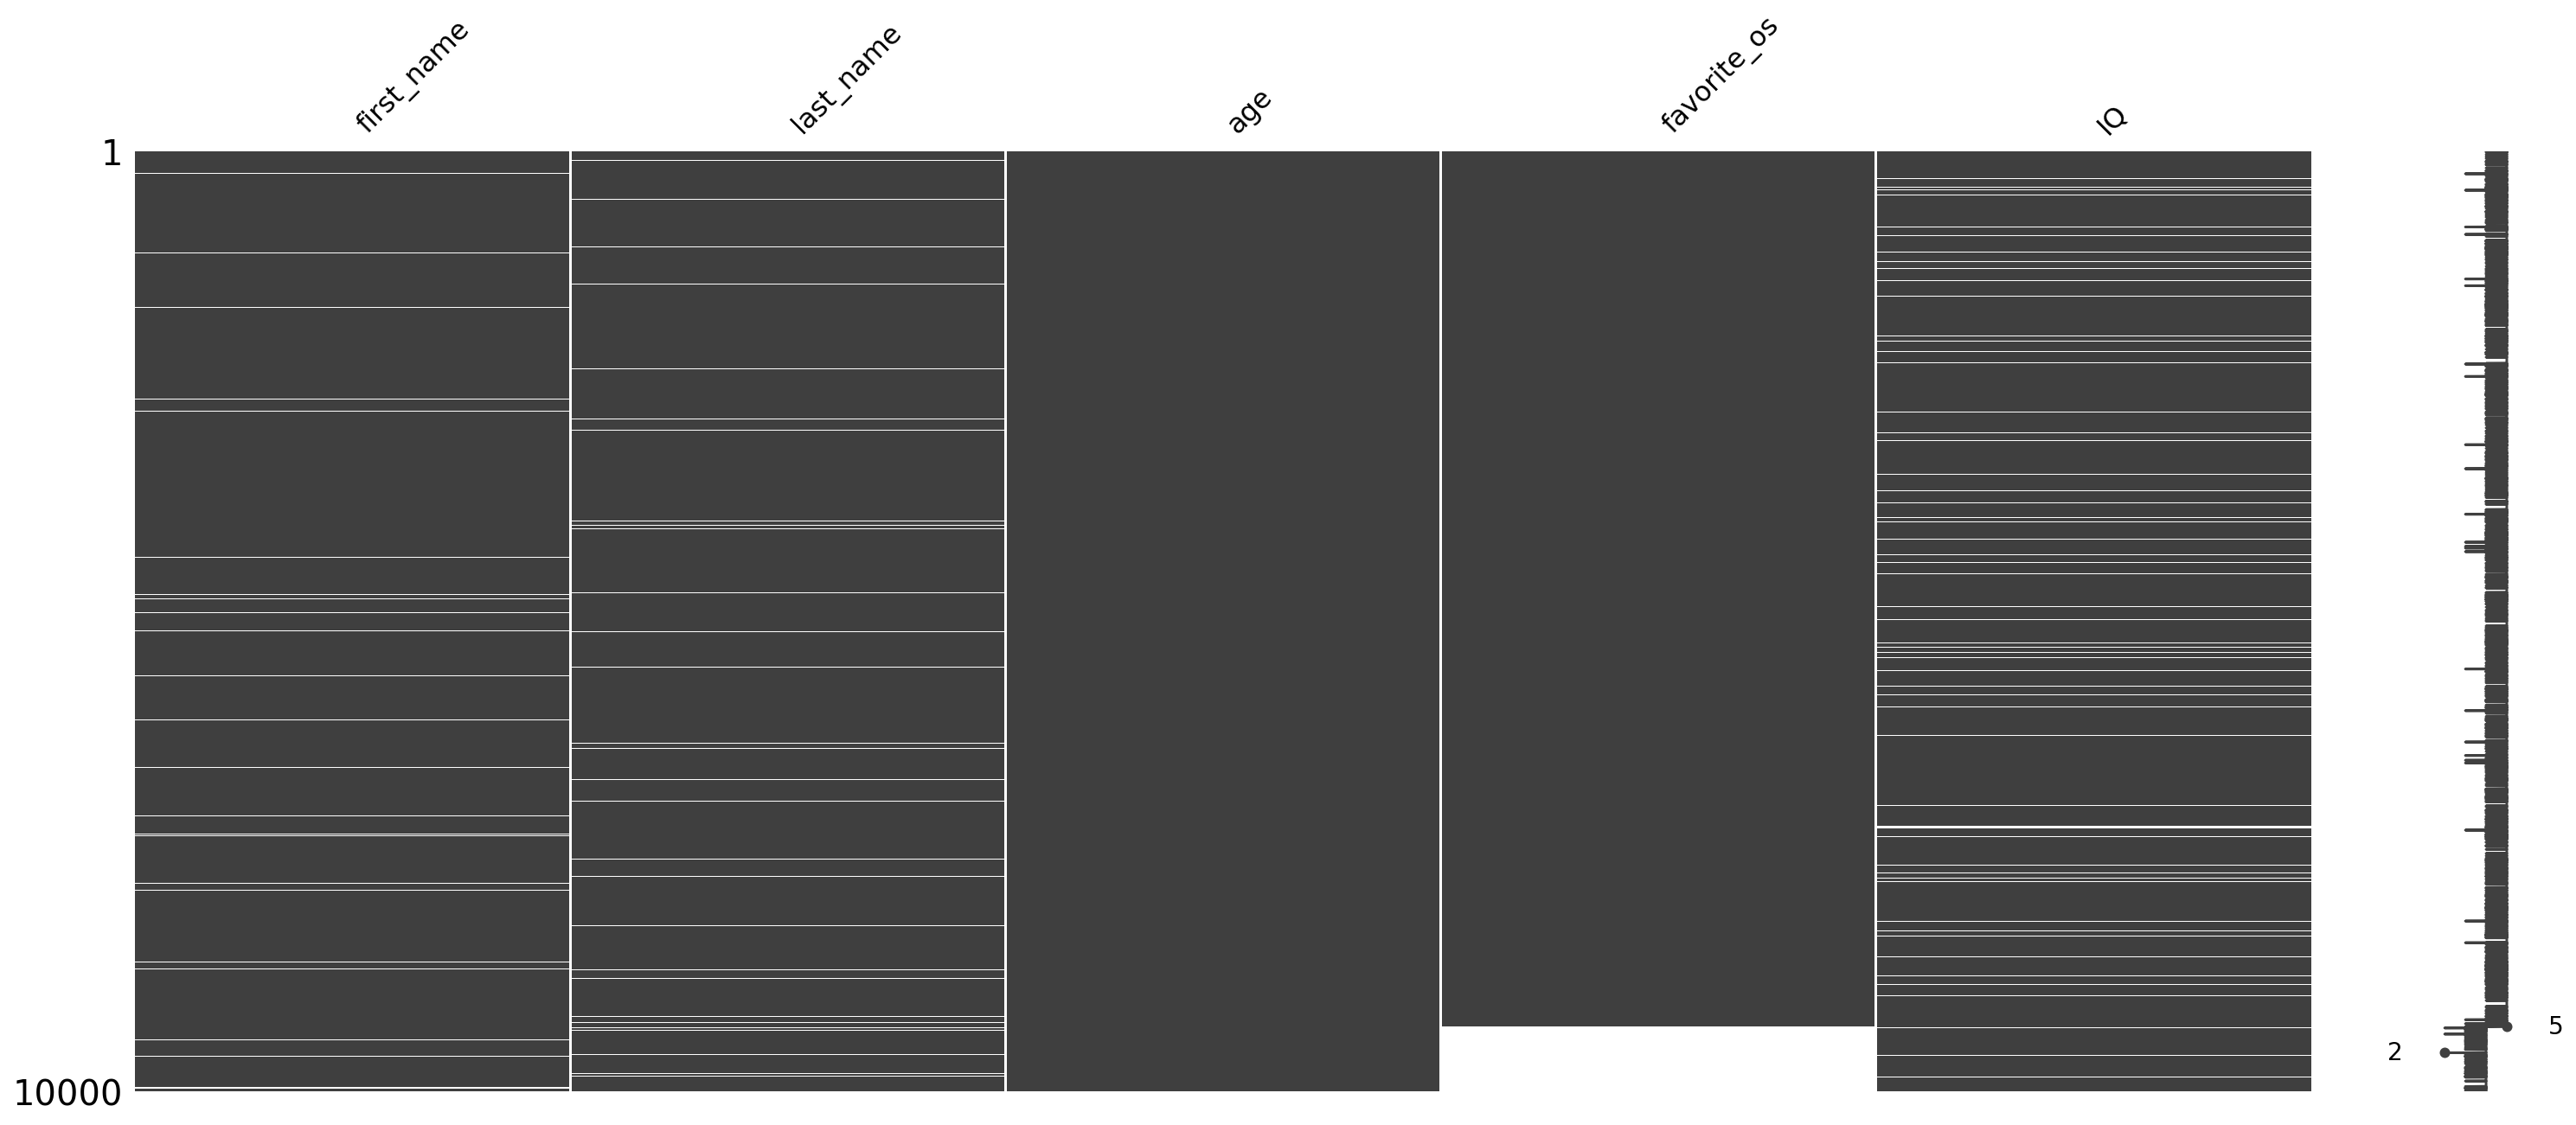

In [20]:
msno.matrix(survey.sort_values('age'));

Now, all the missing values are at the bottom because `sort_values` sorts in ascending order. In general, MAR has some degree of randomness but that randoms is related to specific groups of **observed** data like our example of favorite mobile OS or the fact that students are more absent during winter. At first, MAR can seem as MCAR but there will always be some unnoticed relationship between observed values. 

### Missingness Types: MNAR or NMAR <small id='mnar'></small>

> Fancy Description: There is a relationship between missingness and its values, missing or not.

In Missing Not At Random case, there will be a systematic relationship between missing values and some unobserved factors. For example, if you are working on a survey data of your products and you find a lot of values for satisfaction score are null. You dig deeper, search for relationship between the existing features but you find none. This is the clear case of MNAR. From your experience, you may think that customers were so unsatisfied with your products that they left these fields blank. 

If we look at the matrix plot of our `survey` dataset, there is an `IQ` column which suspiciously look like MNAR. Let's try sorting by age to see if it makes any difference:

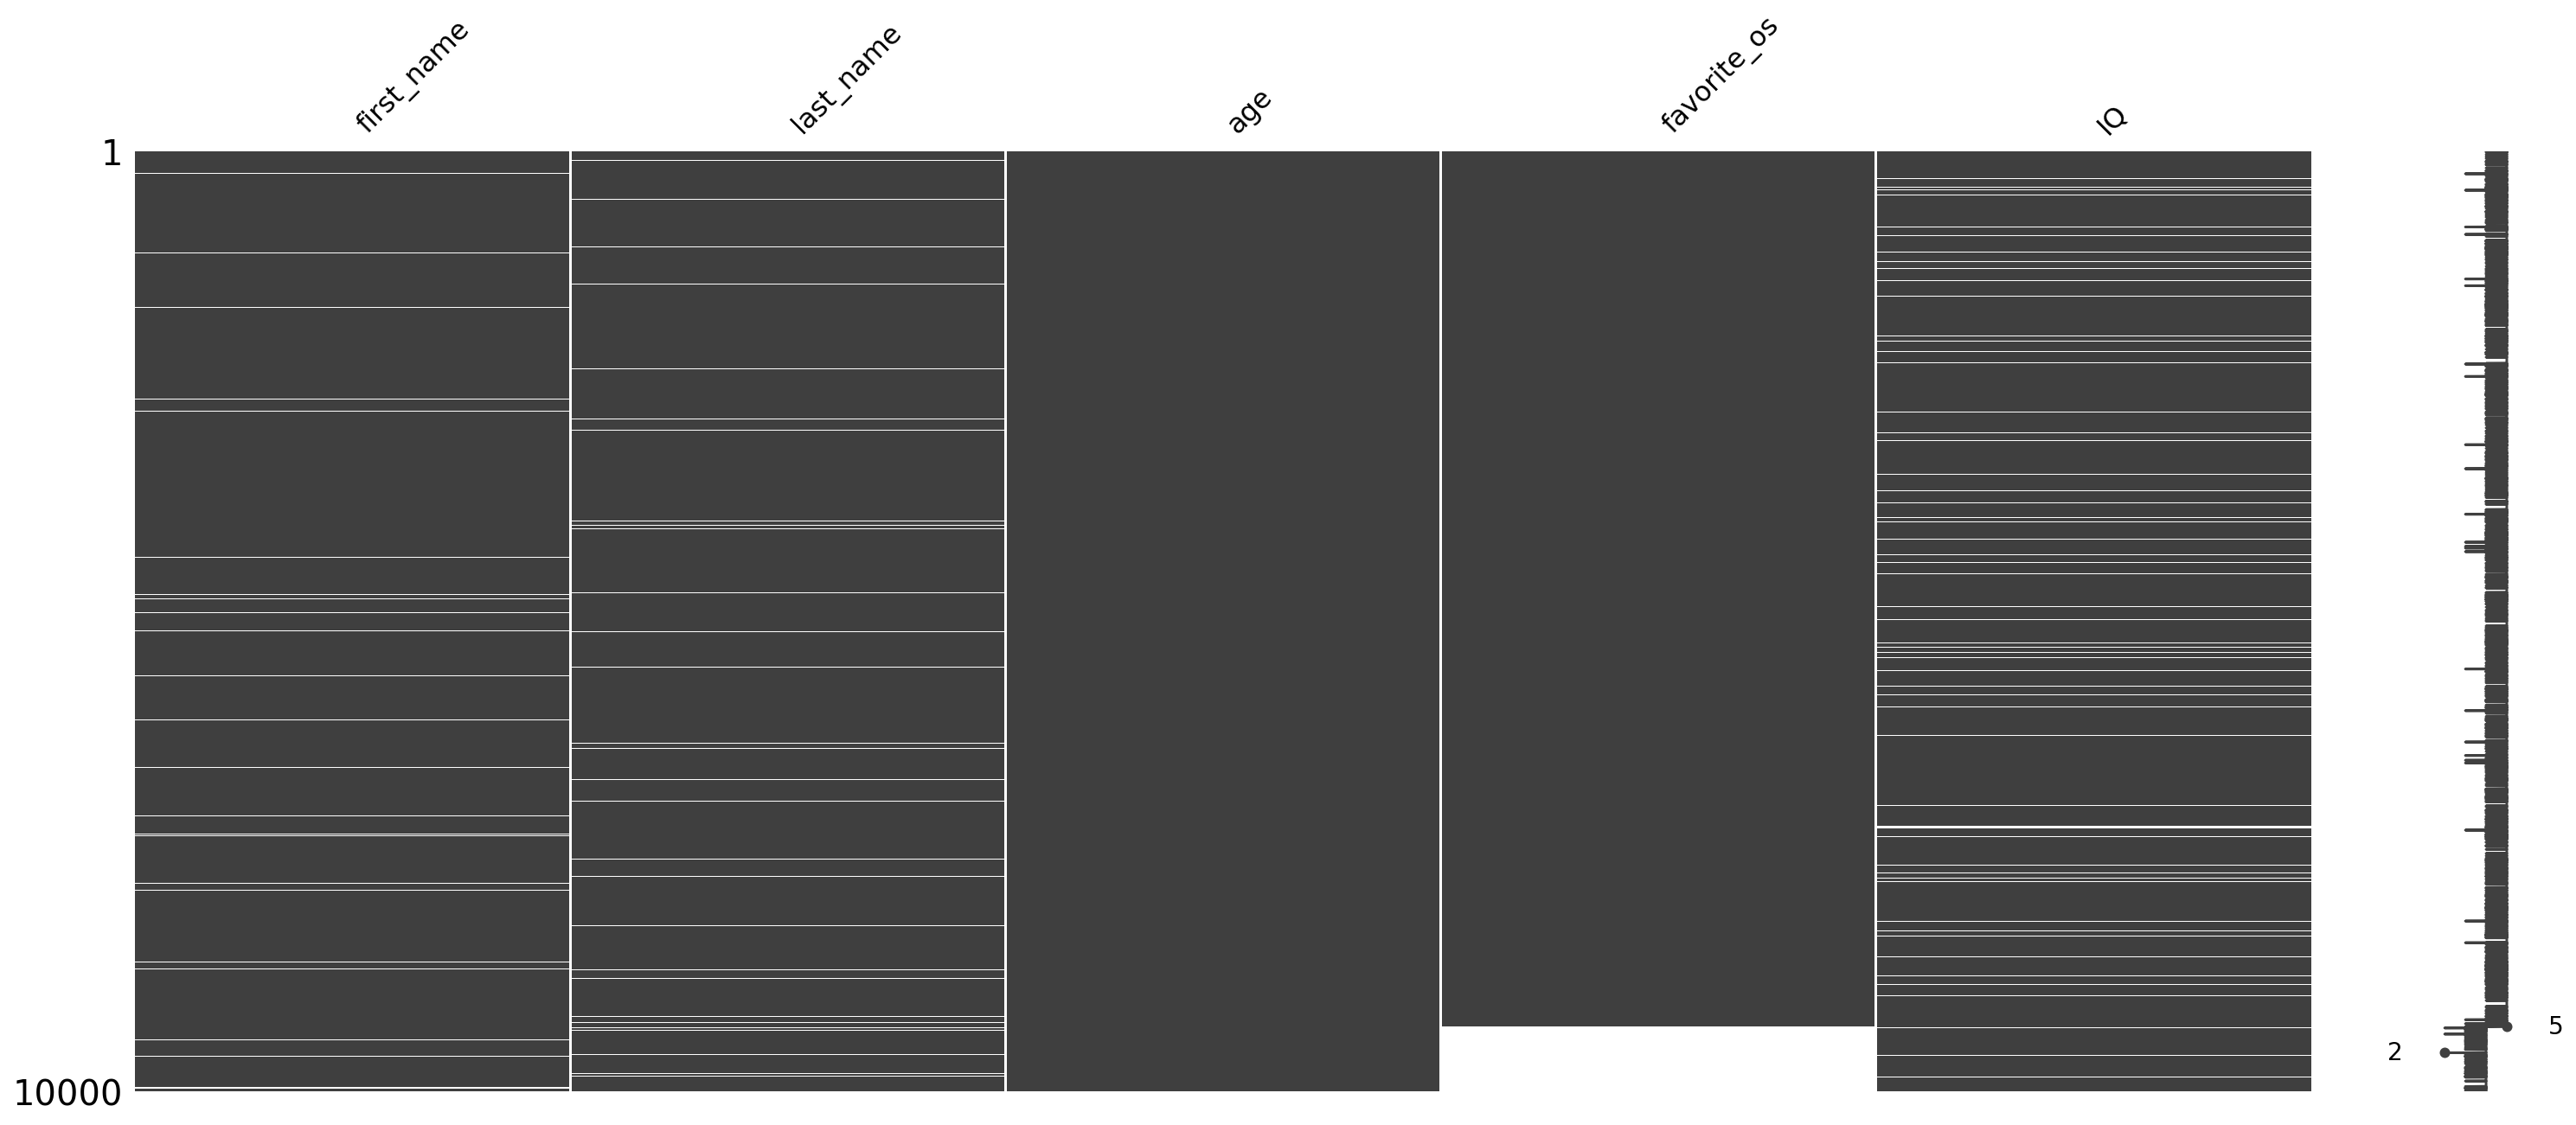

In [21]:
msno.matrix(survey.sort_values('age'));

Still, they are randomly scattered. If you think for a moment, the reason why people leave IQ field blank can be because of 2 reasons: embarrassment or the fact they never took an IQ test. Both of these reasons are not observed in our dataset and it is completely out of our hands to control them. In other words, the missingness only relates to the variable itself, not other variables in our dataset. 

This can also be confirmed with the correlation matrix we had earlier (remember, no score). 
It is also the case for `skin_thickness` and `insulin` columns of the `diabetes` dataset:

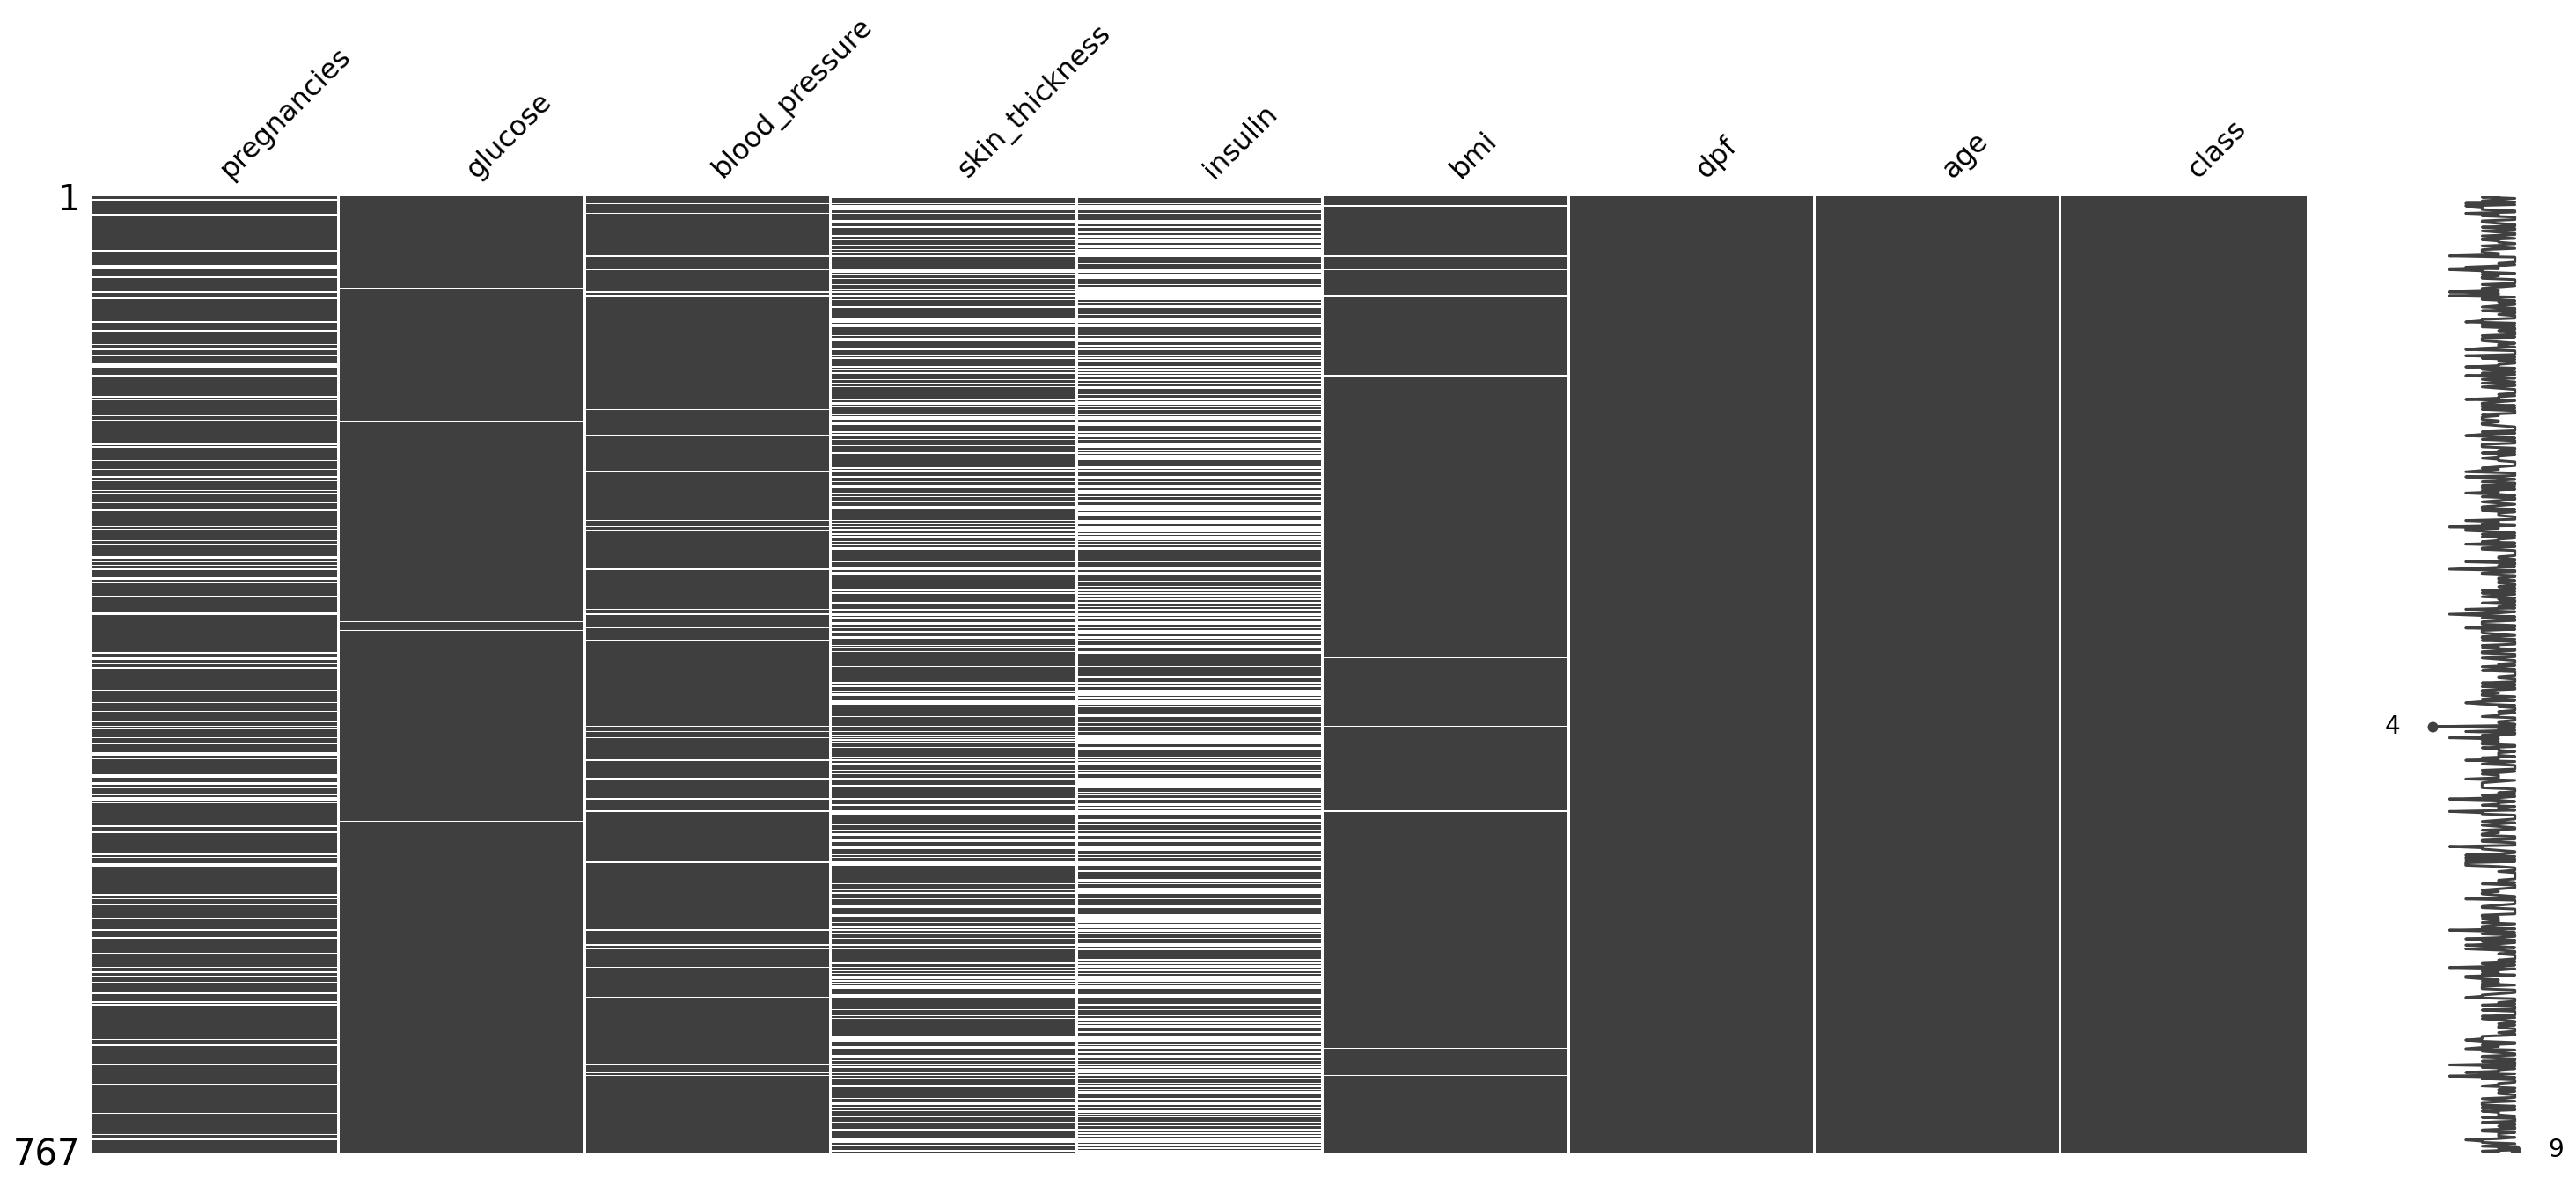

In [22]:
msno.matrix(diabetes);

One thing to note here is that you should not confuse MNAR with MCAR. Even though they both have no correlation for the observed variables in data, the number of null values in MNAR will be much higher than in MCAR.

I understand that the 3 categories can be pretty confusing. That's why here are some links that might help enhance your understanding: [link 1](https://stefvanbuuren.name/fimd/sec-MCAR.html) and [link 2](https://www.researchgate.net/post/What-the-difference-between-MAR-MCAR-and-MNAR-in-missing-data-mechanism).